# HW#5 -Yasemin Aylin Akturk

Different than the final:

* An indexing issue is fixed in the previously built performance metric "Total lost money" (Section 2.5)
* The loan amount is no longer kept as a feature, but, weighted in  only as "cost" this time. (Section 2.3)

For the codes, results and R-files please check: https://github.com/BU-IE-582/fall21-yaseminaylinakturk/tree/gh-pages/HW5

### 1. Introduction

1.1. Read the data set

1.2. Duplicate check

1.3. Missing value check

1.4. Get a quick look into the data

1.5. Conver to all numeric

1.6. Check the ranges: Scaling will be necessary

1.7. Get an insight about the class distribution

1.8. Correlation check

### 2. Approach

2.1. Split the data into test&train partition

2.2. Class Distribution: Train subset

2.3. Scaling: Prepare the train partition

2.4. Prepare the test partition

2.5. Performance measure

2.6. Methods to improve performance on imbalanced data

2.7. Models

    *2.7.1 RandomForest (RF),
       Feature selection: Variable importance
    * 2.7.2 Decision trees (DC),
    * 2.7.3 Gradient Boosting Method (GBM),
    * 2.7.4 Logistic Regression with Lasso - Ridge Penalty (LR),
    * 2.7.5 Support Vector Machines (SVM),
    * 2.7.6 Weighted Models
    * 2.7.7 k-Nearest Neighbor (KNN) 
    * 2.7.8 Ensembled models

### 3. Results

3.1. Comparision of all the models (Test performance)

3.2. Comparision of the best performing models

3.3. Selection of the final model

3.4. Prepration of the actual test data

3.5. Use the final model to predict

### 4. Conclusions and Future Work

##

# 1. Introduction

This section provides descriptive analysis of the given data. 

This data set is created for credit scoring purposes. Due to privacy concerns, the name of most of the features are masked.
Since there is no information about most of the features and it is mostly not possible to put some meaning to the features. Therefore, interpretation cannot be used, solely data-centric methods can be used for feature elimination when necessary.

There is no NAs values ,the data set is fully observed.
There is no duplicated values.

The target value "default"  consists of two classes which are “0”, and “1”.

The data is an imbalanced classification data, the number of "0" and "1" are not in-balance.

In such cases, one potential problem is not being able to learn/understand the pattern for the class with less samples.
There are a few popular techniques to deal with class imbalance. These method are brefily introduced in the "Approach" section and used for model developement.

In [ ]:
library("data.table")
library("dplyr")
library("mice")
library("tidyr")
library("stringr")
library("ggplot2")
library("caret")
library("glmnet")
library("smotefamily")
library(dplyr) 
library(caret) 
library(purrr)
library(pROC) 
library("corrplot")
library("ROSE")
library(randomForest)
library(caret)
library(e1071)
library("kernlab")
library("smotefamily")
library("class")
library("kknn")
library(caretEnsemble)
library("VIM")
library('skimr')
library("rpart")
library(gbm)

In [1]:
#2020802000 yasemin aylin akturk
#HW#5
#27.01.2022

klasor =  "C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/HW5/"

setwd(klasor)

### 1.1. First, the test data is read. It has many features.

In [2]:
#read----
#data skim ----

datatrain <- read.csv("train.csv", header = T)

head(datatrain)

dim(datatrain)

#many features
dim(datatrain)   #1715   63

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,...,0,0,0,N,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,...,0,0,0,N,0.0,0,0,0,1,0
3,6858.0,0,39,4,2,3,55,58,10,...,700,0,700,N,700.0,0,0,4,6,0
4,2434.5,0,49,3,1,3,98,98,11,...,16350,127,16935,N,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,...,3000,142,3400,N,1700.0,0,0,2,10,0
7,6899.0,0,44,1,0,1,37,37,5,...,150,0,150,N,150.0,0,0,0,3,0


[1] 1715   63

[1] 1715   63

### 1.2. Duplicate check

In [15]:
#duplicated?
sum(duplicated(datatrain))
#no duplicated 

#save the org data, do manipulations to the datatrain
orginaltrain = datatrain 
head(orginaltrain)
dim(orginaltrain) #1715   63

[1] 0

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,...,0,0,0,N,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,...,0,0,0,N,0.0,0,0,0,1,0
3,6858.0,0,39,4,2,3,55,58,10,...,700,0,700,N,700.0,0,0,4,6,0
4,2434.5,0,49,3,1,3,98,98,11,...,16350,127,16935,N,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,...,3000,142,3400,N,1700.0,0,0,2,10,0
7,6899.0,0,44,1,0,1,37,37,5,...,150,0,150,N,150.0,0,0,0,3,0


[1] 1715   63

### 1.3. Missing value check


 Variables sorted by number of missings: 
            Variable Count
 loan_application_id     0
         loan_amount     0
             default     0
        customer_age     0
               Var_1     0
               Var_2     0
               Var_3     0
               Var_4     0
               Var_5     0
               Var_6     0
               Var_7     0
               Var_8     0
               Var_9     0
              Var_10     0
              Var_11     0
              Var_12     0
              Var_13     0
              Var_14     0
              Var_15     0
              Var_16     0
              Var_17     0
              Var_18     0
              Var_19     0
              Var_20     0
              Var_21     0
              Var_22     0
              Var_23     0
              Var_24     0
              Var_25     0
              Var_26     0
              Var_27     0
              Var_28     0
              Var_29     0
              Var_30     0
            

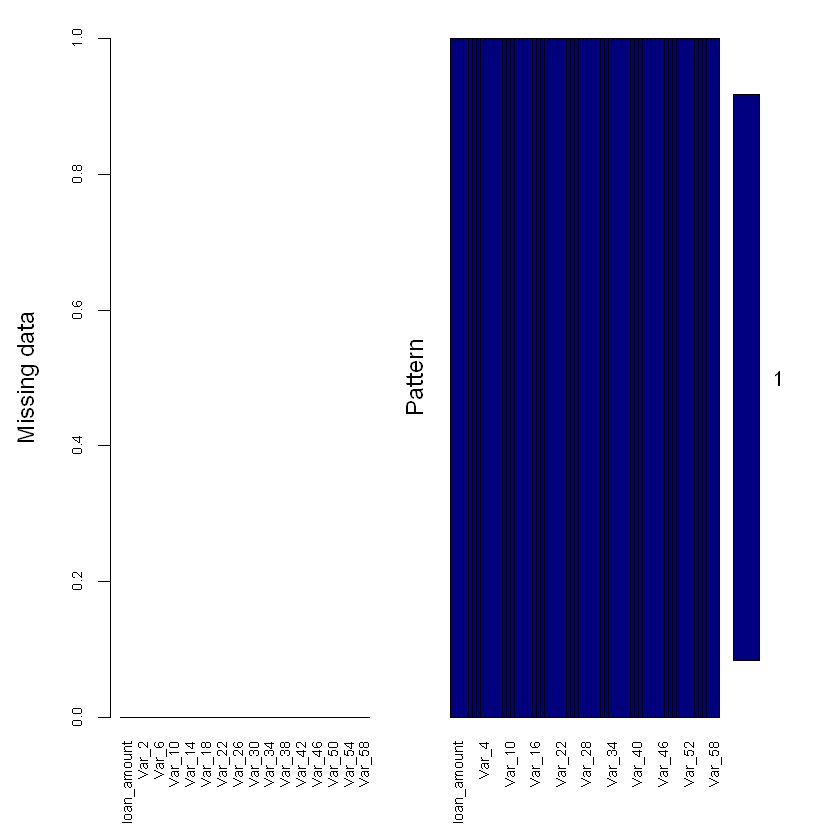

In [16]:
#any missing value?

datatrain [datatrain  == " "] <- NA
datatrain[datatrain  == ""] <- NA

#check NA #how many NA's
nalist = cbind(
  lapply(
    lapply(datatrain, is.na)
    , sum)
)

#pattern NA

mice_plot <- aggr(datatrain, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(datatrain), cex.axis=.7,
                  gap=3, ylab=c("Missing data","Pattern"))
#


#### There is no NAs values ,the data set is fully observed.

### 1.4. Get a quick look into the data

In [17]:
str(datatrain)

'data.frame':	1715 obs. of  63 variables:
 $ loan_application_id: int  1 2 3 4 5 7 8 10 11 12 ...
 $ loan_amount        : num  2855 1577 6858 2434 4964 ...
 $ default            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ customer_age       : int  25 53 39 49 47 44 53 37 51 40 ...
 $ Var_1              : int  3 0 4 3 2 1 9 1 1 1 ...
 $ Var_2              : int  1 0 2 1 1 0 1 0 0 0 ...
 $ Var_3              : int  1 0 3 3 1 1 3 0 2 2 ...
 $ Var_4              : int  37 0 55 98 110 37 245 67 32 68 ...
 $ Var_5              : int  41 26 58 98 124 37 245 74 56 78 ...
 $ Var_6              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_7              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_8              : int  1330 1478 1060 1218 1334 1622 1349 1728 1008 1116 ...
 $ Var_9              : int  1 1 3 4 4 1 16 2 8 2 ...
 $ Var_10             : int  4 1 4 7 6 2 17 2 9 4 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_13             : int

### 1.5. Conver to all numeric

#### We have char/factor variables, need to convert them.

In [18]:
#we have char variables.
#$ Var_39 and  $ Var_53  : char
#converto to numeric
unique(datatrain$Var_39)
unique(datatrain$Var_53)

datatrain$Var_39=ifelse(datatrain$Var_39== "Y",1,0)
datatrain$Var_53=ifelse(datatrain$Var_53== "Y",1,0)

[1] N Y
Levels: N Y

[1] N Y
Levels: N Y

In [9]:
#now all numeric
str(datatrain)

'data.frame':	1715 obs. of  63 variables:
 $ loan_application_id: int  1 2 3 4 5 7 8 10 11 12 ...
 $ loan_amount        : num  2855 1577 6858 2434 4964 ...
 $ default            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ customer_age       : int  25 53 39 49 47 44 53 37 51 40 ...
 $ Var_1              : int  3 0 4 3 2 1 9 1 1 1 ...
 $ Var_2              : int  1 0 2 1 1 0 1 0 0 0 ...
 $ Var_3              : int  1 0 3 3 1 1 3 0 2 2 ...
 $ Var_4              : int  37 0 55 98 110 37 245 67 32 68 ...
 $ Var_5              : int  41 26 58 98 124 37 245 74 56 78 ...
 $ Var_6              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_7              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_8              : int  1330 1478 1060 1218 1334 1622 1349 1728 1008 1116 ...
 $ Var_9              : int  1 1 3 4 4 1 16 2 8 2 ...
 $ Var_10             : int  4 1 4 7 6 2 17 2 9 4 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_13             : int

In [20]:
#quick look
summary(datatrain)


 loan_application_id  loan_amount      default        customer_age  
 Min.   :   1.0      Min.   : 771   Min.   :0.0000   Min.   :19.00  
 1st Qu.: 617.5      1st Qu.:1969   1st Qu.:0.0000   1st Qu.:29.00  
 Median :1263.0      Median :2677   Median :0.0000   Median :40.00  
 Mean   :1273.2      Mean   :2949   Mean   :0.1003   Mean   :41.32  
 3rd Qu.:1934.0      3rd Qu.:3763   3rd Qu.:0.0000   3rd Qu.:52.00  
 Max.   :2562.0      Max.   :7994   Max.   :1.0000   Max.   :74.00  
     Var_1           Var_2            Var_3           Var_4       
 Min.   :0.000   Min.   : 0.000   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.: 0.000   1st Qu.: 0.00   1st Qu.: 32.00  
 Median :2.000   Median : 1.000   Median : 1.00   Median : 68.00  
 Mean   :2.433   Mean   : 1.171   Mean   : 2.83   Mean   : 76.85  
 3rd Qu.:3.000   3rd Qu.: 2.000   3rd Qu.: 4.00   3rd Qu.:109.00  
 Max.   :9.000   Max.   :27.000   Max.   :50.00   Max.   :301.00  
     Var_5            Var_6            Var_7    

### 1.6. Check the ranges: Scaling will be necessary

In [11]:

skim(datatrain)

Warning message:
"package 'skimr' was built under R version 3.6.3"

-- Data Summary ------------------------
                           Values   
Name                       datatrain
Number of rows             1715     
Number of columns          63       
_______________________             
Column type frequency:              
  numeric                  63       
________________________            
Group variables            None     

-- Variable type: numeric ------------------------------------------------------
# A tibble: 63 x 11
   skim_variable       n_missing complete_rate      mean        sd    p0     p25
 * <chr>                   <int>         <dbl>     <dbl>     <dbl> <dbl>   <dbl>
 1 loan_application_id         0             1  1273.      749.        1  618.  
 2 loan_amount                 0             1  2949.     1323.      771 1969.  
 3 default                     0             1     0.100     0.300     0    0   
 4 customer_age                0             1    41.3      13.7      19   29   
 5 Var_1                       0      

### 1.7. Get an insight about the class distribution

#### Below the class distribution can be seen. Almost 90% of the training data comes from "0" class and only the 10% comes from "1" cases


        0         1 
0.8997085 0.1002915 

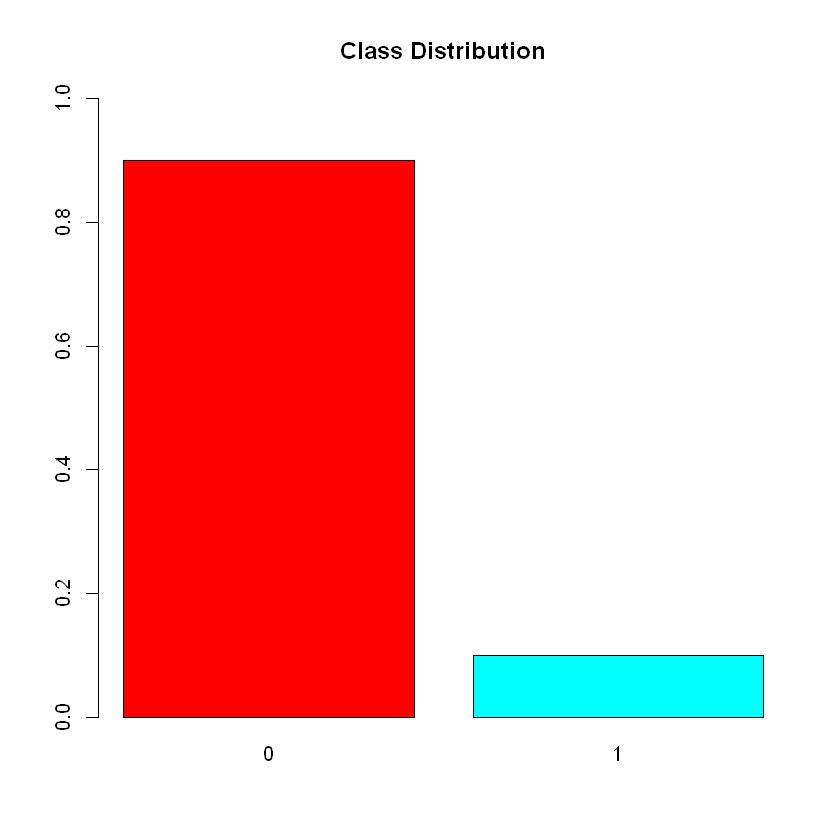

In [21]:
#show class dist.
#imbalanced data set
prop.table(table(datatrain$default))

barplot(prop.table(table(datatrain$default)),
        col = rainbow(2),
        ylim = c(0, 1),
        main = "Class Distribution")


### 1.8. Correlation check

#### Some vairables seem to be correlated. Feature selection made by performed. Some models will be developed in the next section based on only "more important" features selected by RF models, based on permutation based importance. 

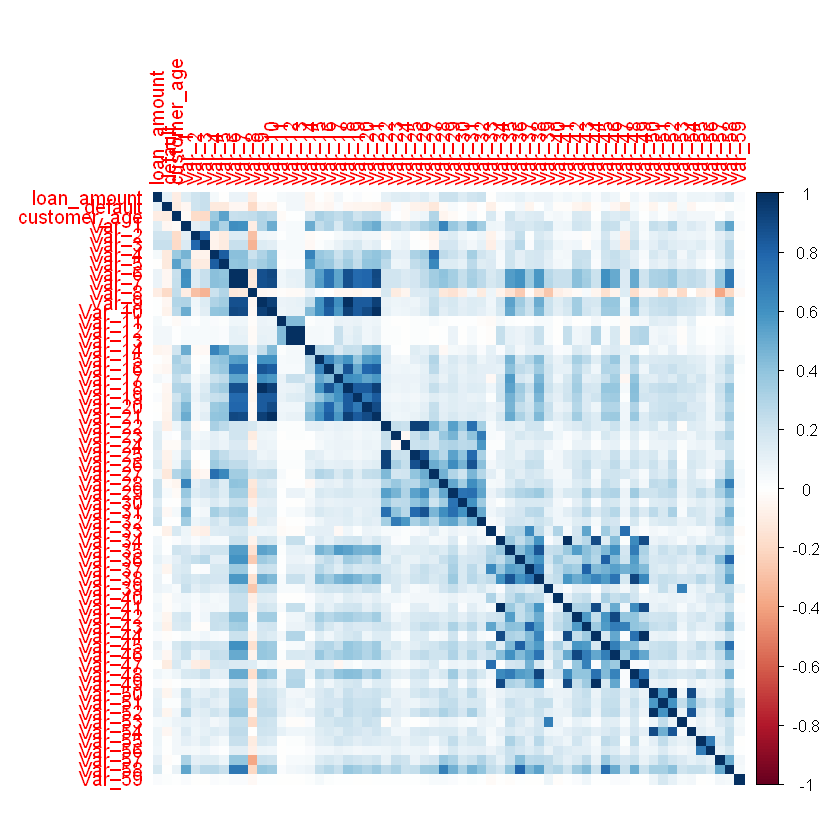

In [22]:
#check correlation
#id is not needed

Cormat = cor(datatrain[,-1])

corrplot(Cormat, method= "color") 
#some are correlated, deal with feature selection by RF perm varImportance


#### Some features seem to be correlated,we will handle with feature selection by RF varImportance

In [10]:
head(datatrain)
#we dont need app_id 

datatrain =  datatrain [,-1]
head(datatrain)

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,...,0,0,0,0,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,...,0,0,0,0,0.0,0,0,0,1,0
3,6858.0,0,39,4,2,3,55,58,10,...,700,0,700,0,700.0,0,0,4,6,0
4,2434.5,0,49,3,1,3,98,98,11,...,16350,127,16935,0,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,...,3000,142,3400,0,1700.0,0,0,2,10,0
7,6899.0,0,44,1,0,1,37,37,5,...,150,0,150,0,150.0,0,0,0,3,0


loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
2855.0,0,25,3,1,1,37,41,5,5,...,0,0,0,0,0.0,0,0,1,1,0
1577.0,0,53,0,0,0,0,26,2,2,...,0,0,0,0,0.0,0,0,0,1,0
6858.0,0,39,4,2,3,55,58,10,10,...,700,0,700,0,700.0,0,0,4,6,0
2434.5,0,49,3,1,3,98,98,11,11,...,16350,127,16935,0,8467.5,0,0,0,5,0
4964.0,0,47,2,1,1,110,124,15,15,...,3000,142,3400,0,1700.0,0,0,2,10,0
6899.0,0,44,1,0,1,37,37,5,5,...,150,0,150,0,150.0,0,0,0,3,0


# 2. Approach

### 2.1. Split the data into test&train partition

In [13]:
#Spliting training set into two parts based on outcome: 75% and 25%----
#internal train and test

set.seed(123)
index <- createDataPartition(datatrain$default, p=0.75, list=FALSE)
trainSet <- datatrain[ index,]
testSet <- datatrain[-index,]
head(trainSet)


,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,5,...,0,0,0,0,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,2,...,0,0,0,0,0.0,0,0,0,1,0
4,2434.5,0,49,3,1,3,98,98,11,11,...,16350,127,16935,0,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,15,...,3000,142,3400,0,1700.0,0,0,2,10,0
6,6899.0,0,44,1,0,1,37,37,5,5,...,150,0,150,0,150.0,0,0,0,3,0
8,1640.0,0,37,1,0,0,67,74,5,5,...,500,0,500,0,500.0,0,0,0,3,0


In [25]:
sum(trainSet$default) #123 in train subset out of 1287
length(trainSet$default)  #1287
length(testSet$default) #428
sum(testSet$default) #49 1s in test set

[1] 123

[1] 1287

[1] 428

[1] 49

### 2.2. Class Distribution: Train subset

#### It is important that the data proportions hold the imbalance pattern of the main data.  90%-10% imbalance is observed.


        0         1 
0.9044289 0.0955711 

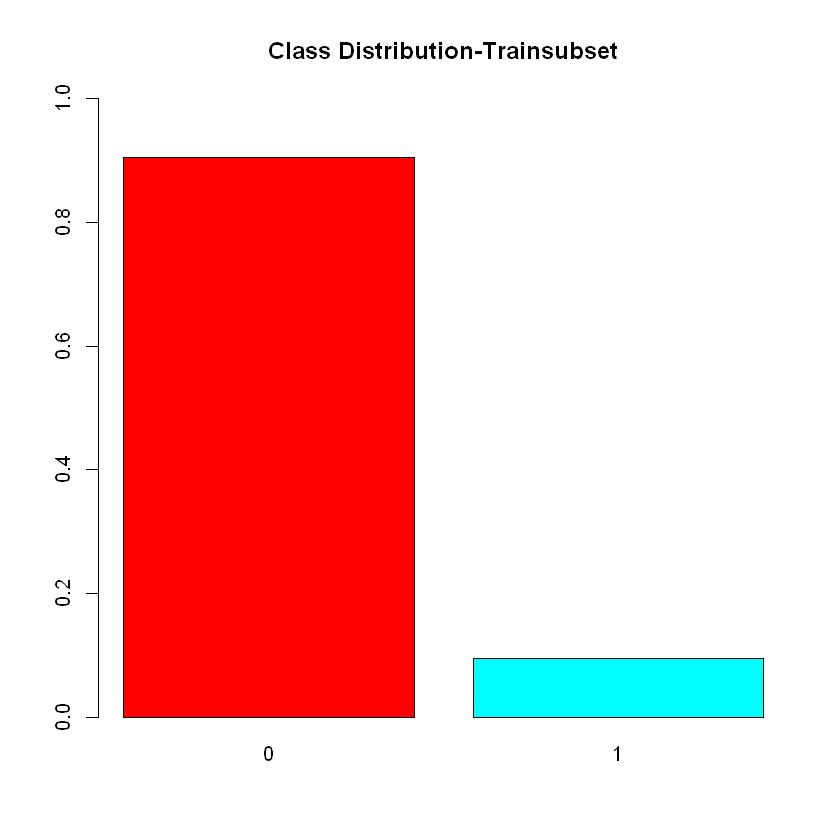

In [26]:
#imbalanced in the subset for train
prop.table(table(trainSet$default))

barplot(prop.table(table(trainSet$default)),
        col = rainbow(2),
        ylim = c(0, 1),
        main = "Class Distribution-Trainsubset")


### 2.3. Scaling: Prepare the train partition

In [14]:
head(trainSet)
#scale without target column (default) [2], drop loan [1]

alltrainscl <- as.data.table(scale(trainSet[,-c(1,2)]))

#add target col
alltrainsclall= cbind(alltrainscl, trainSet$default)
colnames(alltrainsclall)[61] <-  "default" 
head(alltrainsclall)
dim(alltrainsclall) #1287   61 #no id and no loan amount (63-2=61)


,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,5,...,0,0,0,0,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,2,...,0,0,0,0,0.0,0,0,0,1,0
4,2434.5,0,49,3,1,3,98,98,11,11,...,16350,127,16935,0,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,15,...,3000,142,3400,0,1700.0,0,0,2,10,0
6,6899.0,0,44,1,0,1,37,37,5,5,...,150,0,150,0,150.0,0,0,0,3,0
8,1640.0,0,37,1,0,0,67,74,5,5,...,500,0,500,0,500.0,0,0,0,3,0


customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,default
-1.1783130,0.4003579,-0.08541655,-0.4178275,-0.6969520,-0.8225300,-0.6478459,-0.6641196,0.2738669,-0.5420122,...,-0.3962407,-0.5108426,-0.3336351,-0.5398318,-0.3149138,-0.2599938,-0.03131743,-1.1962409,-0.07375928,0
0.8802358,-1.6416260,-0.58738504,-0.6447236,-1.3437181,-1.0693197,-1.1402342,-1.1495732,0.8175137,-0.5420122,...,-0.3962407,-0.5108426,-0.3336351,-0.5398318,-0.3149138,-0.2599938,-0.82162206,-1.1962409,-0.07375928,0
0.5861574,0.4003579,-0.08541655,0.0359649,0.3693381,0.1152708,0.3369309,0.3067876,-0.1375414,0.2812408,...,-0.3258446,3.4596975,-0.3336351,3.0545528,-0.3149138,-0.2599938,-0.82162206,0.1799039,-0.07375928,0
0.4391182,-0.2803034,-0.08541655,-0.4178275,0.5791001,0.5430396,0.9934487,0.9540590,0.2885601,0.2812408,...,-0.3175301,0.2863134,-0.3336351,0.1818043,-0.3149138,-0.2599938,0.75898719,1.9000849,-0.07375928,0
0.2185594,-0.9609647,-0.58738504,-0.4178275,-0.6969520,-0.8883406,-0.6478459,-0.6641196,1.3464672,-0.5420122,...,-0.3962407,-0.4756739,-0.3336351,-0.4761580,-0.3149138,-0.2599938,-0.82162206,-0.5081685,-0.07375928,0
-0.2960778,-0.9609647,-0.58738504,-0.6447236,-0.1725470,-0.2795927,-0.6478459,-0.6641196,1.7358358,-0.2675946,...,-0.3962407,-0.3936138,-0.3336351,-0.3275859,-0.3149138,-0.2599938,-0.82162206,-0.5081685,-0.07375928,0


[1] 1287   61

### 2.4. Prepare the test partition

In [15]:
#same for test partition
head(testSet)
#scale without target column (default) , remove loan
alltestscl <- as.data.table(scale(testSet[,-c(1,2)]))
#add target col
alltestsclall= cbind(alltestscl, testSet$default)
dim(alltestsclall)
colnames(alltestsclall)[61] <-  "default" 
head(alltestsclall)
dim(alltestsclall) #428   61 #no id, no loan

,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
3,6858.0,0,39,4,2,3,55,58,10,10,...,700,0,700,0,700.00,0,0,4,6,0
7,6493.0,0,53,9,1,3,245,245,32,32,...,3200,1628,8809,0,2202.25,29044,979,2,15,0
15,3306.0,0,23,2,0,0,19,19,2,2,...,0,0,0,0,0.00,0,0,0,2,0
21,2343.5,0,36,4,0,0,119,119,9,11,...,1500,0,1500,0,1500.00,0,0,0,3,0
22,4696.0,0,49,6,2,2,178,178,16,16,...,1500,1354,1500,0,1500.00,0,0,1,6,0
23,1806.0,1,32,5,5,16,124,127,15,15,...,1000,1005,1000,1,1000.00,0,0,0,3,0


[1] 428  61

customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,default
-0.2320040,0.9072002,0.44790093,0.0480011,-0.4029464,-0.6055596,0.12364471,0.1042947,-0.6983271,-0.0763756,...,-0.40081426,-0.3424403,-0.3466086,-0.26657120,-0.3061672,-0.3359384,2.23886827,0.5886899,-0.06278656,0
0.7790273,3.9264978,-0.09516309,0.0480011,3.1117595,2.6606019,3.45004057,3.4108238,0.3396766,2.9374815,...,0.33040833,1.3742337,-0.3466086,0.39842656,4.1779829,3.0735859,0.72387124,3.7557760,-0.06278656,0
-1.3874683,-0.3005189,-0.63822711,-0.6604289,-1.0688907,-1.2867377,-1.08595379,-1.0980795,0.2462922,-0.7718811,...,-0.40081426,-0.4906302,-0.3466086,-0.57643868,-0.3061672,-0.3359384,-0.79112578,-0.8189039,-0.06278656,0
-0.4486536,0.9072002,-0.63822711,-0.6604289,0.7809545,0.4598727,-0.02755511,0.2545915,2.0529215,-0.3082108,...,-0.40081426,-0.1730804,-0.3466086,0.08756307,-0.3061672,-0.3359384,-0.79112578,-0.4670054,-0.06278656,0
0.4901612,2.1149192,0.44790093,-0.1881422,1.8723632,1.4903729,1.03084358,1.0060754,-0.6660018,0.1554596,...,0.20734016,-0.1730804,-0.3466086,0.08756307,-0.3061672,-0.3359384,-0.03362727,0.5886899,-0.06278656,0
-0.7375196,1.5110597,2.07709300,3.1178643,0.8734468,0.5996016,0.87964377,0.8557786,-1.1436990,0.8509651,...,0.05058544,-0.2789304,2.8783581,-0.13377085,-0.3061672,-0.3359384,-0.79112578,-0.4670054,-0.06278656,1


[1] 428  61

### 2.5. Performance measure

#### Performance measure:

 Here the misclassification cost is not the same for the instances due to the varying loan amounts (provided in loan_amount column).
 
#### Classifying Default (Class 1) as Good (Class 0):

It is assumed that we will lose all the amount as the creditor since we will give the credit but the person does not pay the debt
back.

####  Classifying Good (Class 0) as Default (Class 1): 
It is assumed that we will lose the profit which amounts to the 15% of the loan amount since will not approve the loan
application although person pays the debt back.

#### A customized performance metric for "Total money lost"

   A user-specific performance metric was written as given below.      
   Misclassification of each instance is weighted-in by its "loan amount", either by its full "loan amount" or "0.15*loan amount".
   This performance metric was used to evalute the developed models.
   

#### Here, I resolved an indexing issue, due to cross-validation the index of the loan amount may not be "i", therefore it needs to be addressed to the correct row with indexing.

In [25]:
#handle perfomence& imbalance with cost function.
#weight the misclassification of each instance 
#and minizmize cost

#build a custom performance metric
#we have the following cost for each instance 
#for each misclassification

#          pred=1	               pred=0
#obs=1	   0	                  loan_amount
#obs=0	   0,15*loan_amount    	0

In [16]:

#customized performance metric for "Total money lost" ----
#multiply with the actual loan amount, not the scaled version
#index fix due to folding

totalcost = function(data, lev = NULL , model= NULL ) 
  
{
  #conversion, othwerwise they are 1 and 2 
  data$pred <- as.numeric(data$pred)-1
  data$obs <- as.numeric(data$obs)-1 
  
  #keep loan amount here only for those which are in the fold
  loanlist = trainSet$loan_amount[data$rowIndex]
  
  cost= 0
  for (i in 1:length(data$obs)) 
  {
    
    
    if  ( data$obs [i] == 1  & data$pred[i] == 0  )
    {
      #cost = cost +  trainSet$loan_amount [i] #previous
      cost = cost +  loanlist [i]               #now
    }
    
    if  ( data$obs [i] == 0  & data$pred[i] == 1 )
    {
      #cost = cost +  trainSet$loan_amount [i] *0.15   #previous
      cost = cost +   loanlist [i] *0.15                #now
    }
    
  } #end for
  
  
  names(cost) <- c('Total money lost')
  cost
  
  
} #end function


In [17]:

#build the function for test set as well
#to measure performance of the test set
#here the indexing is true



calculate_cost_test = function(pred, true ) 
  
{
  testcost= 0
  for (i in 1:length(pred)) 
  {
    
    if  ( true [i] == 1  & pred[i] == 0  )
    {
      testcost = testcost +  testSet$loan_amount [i] 
      
    }
    
    if  ( true [i] == 0  & pred [i] == 1 )
    {
      testcost  = testcost  +  testSet$loan_amount [i] *0.15
      
    }
    
 
                   
    } #end for
  
  
  names(testcost ) <- c('Total money lost  TEST')
  testcost
  

} #end function

#
#train with alltrainsclall
#test on alltestsclall


#caret selects the parameters for which the cost is minimized
#this is supplied as a performance metric

### 2.6. Methods to improve performance on imbalanced data

#### The following sampling strategies were employed to build several models.

#### Original data: 
In order to make comparision, the originaltrainig data without using any sampling methods was used to build a few models.

#### Down-sampling: randomly remove instances in the majority class

####  Up-sampling: randomly replicate instances in the minority class

#### Synthetic minority sampling technique (SMOTE): down samples the majority class and synthesizes new minority instances by interpolating between existing ones

#### Class weights: impose a heavier cost when errors are made in the minority class

http://dpmartin42.github.io/posts/r/imbalanced-classes-part-1

### 2.7. Models

#### In total 41 models were built: 

* 2.7.1 RandomForest (RF),

    * Feature selection: Variable importance
* 2.7.2 Decision trees (DC),

* 2.7.3 Gradient Boosting Method (GBM),

* 2.7.4 Logistic Regression with Lasso Penalty (LR),

* 2.7.5 Support Vector Machines (SVM),

* 2.7.6 Weighted Models

* 2.7.7 k-Nearest Neighbor (KNN) 

* 2.7.8 Ensembled models


#### The performance of several sampling techniques (up/down/smote/weighted) was compared.


#### While tuning caret was used to get the "minimum Total money lost". The best tuned model with the minimal cost was then used on the test-partition and "Total money lost" on test data was reported.

#### The models were tested on the test-partition, the comparsion was based on the custom-build : Total cost function  with metric = "Total money lost". 


#### #

### 2.7.1. RF models:
#### RF1 : RF1_tune_length_naive: ,
random tuneleght no over/under sampling, no manupulation
#### RF2 : RF2_grid_spesific_naive:
a specific tunegrid is given. But no over/under sampling, no manupulation
#### down_RF3 RF3_down:
Down sampling with RF and tuning
#### up_RF4 RF4_up: 
Up sampling with RF and tuning
#### smote_RF5: smote_RF5 : 
Using syntethic data and RF tuning
#### down_RF6: RF6_down_reduced_features:
Variable importance (permuation based) was checked and only the most importat factors were added to the model. 
 Down sampling with RF and tuning with less features


#### RF1 : RF1_tune_length_naive:

#### Caret selects the parameters for which the cost is minimized. This is how the best tuned model is selected.
#### This is supplied as a performance metric. Maximize is set to FALSE, since the goal is the minimize the total money lost.
#### Then the best tuned model is tested on the partialtest data. The performance in terms of total monay lost on test data is recorded.

In [49]:
# RF models ----
#model1

set.seed(123)
TC <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

RF1 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "ranger",  metric = "Total money lost" ,
                  tuneLength = 3,
                  trControl = TC,
                  maximize = FALSE)
               


RF1

predicted_rf1  <-  predict(RF1   ,alltestsclall[,-61])



table(predicted_rf1 ,  as.factor(alltestsclall$default))


cm1 = confusionMatrix(predicted_rf1 , as.factor(alltestsclall$default))
cm1

testcost1= calculate_cost_test (predicted_rf1 ,  alltestsclall$default)
testcost1


Random Forest 

1287 samples
  60 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1158, 1158, 1159, 1158, 1158, 1159, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Total money lost
   2    gini        41275.65        
   2    extratrees  41551.15        
  31    gini        40824.80        
  31    extratrees  40833.25        
  60    gini        41041.68        
  60    extratrees  40996.25        

Tuning parameter 'min.node.size' was held constant at a value of 1
Total money lost was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 31, splitrule = gini
 and min.node.size = 1.

             
predicted_rf1   0   1
            0 379  43
            1   0   6

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 379  43
         1   0   6
                                          
               Accuracy : 0.8995          
                 95% CI : (0.8671, 0.9263)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.2035          
                                          
                  Kappa : 0.1982          
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.1224          
         Pos Pred Value : 0.8981          
         Neg Pred Value : 1.0000          
             Prevalence : 0.8855          
         Detection Rate : 0.8855          
   Detection Prevalence : 0.9860          
      Balanced Accuracy : 0.5612          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                149277

####   RF2_grid_spesific_naive:

In [51]:
# model2.RF
set.seed(123)
TC2 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

RF2_grid <- expand.grid(mtry = c(1:15) ,min.node.size=c(1,5), splitrule = c("extratrees","gini"))


RF2 <- train(as.factor(default) ~., data = alltrainsclall,
             method = "ranger",  metric = "Total money lost" ,
             tuneGrid = RF2_grid,
             trControl = TC2,
             maximize = FALSE)




predicted_rf2  <-  predict(RF2   ,alltestsclall[,-61])

table(predicted_rf2 ,  as.factor(alltestsclall$default))

cm2 = confusionMatrix(predicted_rf2 , as.factor(alltestsclall$default))
cm2

testcost2= calculate_cost_test (predicted_rf2 ,  alltestsclall$default)
testcost2

             
predicted_rf2   0   1
            0 379  48
            1   0   1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 379  48
         1   0   1
                                          
               Accuracy : 0.8879          
                 95% CI : (0.8541, 0.9161)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.4775          
                                          
                  Kappa : 0.0356          
                                          
 Mcnemar's Test P-Value : 1.17e-11        
                                          
            Sensitivity : 1.00000         
            Specificity : 0.02041         
         Pos Pred Value : 0.88759         
         Neg Pred Value : 1.00000         
             Prevalence : 0.88551         
         Detection Rate : 0.88551         
   Detection Prevalence : 0.99766         
      Balanced Accuracy : 0.51020         
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                162642

#### The models without sampling cannot learn due to imbalance. From now on, sampling will be introduced.

####  RF3_down:

In [52]:
#option1 : down sampling

# Build down-sampled model

set.seed(123)
TC3 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


TC3$sampling <- "down"

RF3_grid <- expand.grid(mtry = c(1:15) ,min.node.size=c(1,5), splitrule = c("extratrees","gini"))


down_RF3 <- train(as.factor(default) ~., data = alltrainsclall,
             method = "ranger",  metric = "Total money lost" ,
             tuneGrid = RF3_grid,
             trControl = TC3,
             maximize = FALSE) 


predicted_rf3  <-  predict(down_RF3  ,alltestsclall[,-61])

table(predicted_rf3 ,  as.factor(alltestsclall$default))

cm3 = confusionMatrix(predicted_rf3 , as.factor(alltestsclall$default))
cm3

testcost3= calculate_cost_test (predicted_rf3 ,  alltestsclall$default)
testcost3


             
predicted_rf3   0   1
            0 242  23
            1 137  26

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 242  23
         1 137  26
                                          
               Accuracy : 0.6262          
                 95% CI : (0.5784, 0.6722)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.084           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6385          
            Specificity : 0.5306          
         Pos Pred Value : 0.9132          
         Neg Pred Value : 0.1595          
             Prevalence : 0.8855          
         Detection Rate : 0.5654          
   Detection Prevalence : 0.6192          
      Balanced Accuracy : 0.5846          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              137608.3

####  RF4_up:

In [53]:
#option2 : "up" sampling

# Buil up-sampled model

set.seed(123)
TC4 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


TC4$sampling <- "up"

RF4_grid <- expand.grid(mtry = c(1:15) ,min.node.size=c(1,5), splitrule = c("extratrees","gini"))


up_RF4 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "ranger",  metric = "Total money lost" ,
                  tuneGrid = RF4_grid,
                  trControl = TC4,
                  maximize = FALSE) 


predicted_rf4  <-  predict(up_RF4  ,alltestsclall[,-61])

table(predicted_rf4 ,  as.factor(alltestsclall$default))

cm4 = confusionMatrix(predicted_rf4 , as.factor(alltestsclall$default))
cm4

testcost4= calculate_cost_test (predicted_rf4 ,  alltestsclall$default)
testcost4
#up is not as good as down



             
predicted_rf4   0   1
            0 345  39
            1  34  10

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 345  39
         1  34  10
                                          
               Accuracy : 0.8294          
                 95% CI : (0.7904, 0.8639)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.9998          
                                          
                  Kappa : 0.1197          
                                          
 Mcnemar's Test P-Value : 0.6397          
                                          
            Sensitivity : 0.9103          
            Specificity : 0.2041          
         Pos Pred Value : 0.8984          
         Neg Pred Value : 0.2273          
             Prevalence : 0.8855          
         Detection Rate : 0.8061          
   Detection Prevalence : 0.8972          
      Balanced Accuracy : 0.5572          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                150303

#### smote_RF5 :

In [24]:
#option:3 create a synthetic data with smote to find the 
#first smote to balance the data out

#smote
#8 times larger 
#K=2 negihborhood for generation
set.seed(123)
newtrain <- SMOTE(X=alltrainsclall , target= alltrainsclall$default, K=2, dup_size = 8 )

verynewtrain2 <- newtrain [["data"]]
#dim(verynewtrain2)
#head(verynewtrain2)
#drop class
verynewtrain <- verynewtrain2 [,-62]

#head(verynewtrain)
classnow <- verynewtrain  %>% group_by(default) %>% summarize(count=n()) 
classnow #balanced
head(verynewtrain)
dim(verynewtrain)


default,count
0,1164
1,1107


customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,default
1.0272750,-0.2803034,-0.08541655,-0.4178275,-0.7843528,0.01655492,0.829319218,0.79224115,-0.5452764,0.5556585,...,0.2550621,-0.11226458,2.9949573,-0.2992850,-0.3149138,-0.2599938,1.54929182,1.5560487,8.49455112,1
1.3948730,-0.9609647,-0.58738504,0.9435496,-0.4172693,-0.62509826,-0.155457501,-0.17866603,-0.1999873,-0.2675946,...,-0.3962407,-0.51084257,-0.3336351,-0.5398318,0.8501066,1.7006560,-0.82162206,0.1799039,-0.07375928,1
0.6596770,-0.2803034,-0.58738504,-0.1909313,-0.8018330,-0.98705646,-0.483716407,-0.50230176,-1.0264773,-0.2675946,...,0.8952789,0.07530153,-0.3336351,0.5213978,-0.3149138,-0.2599938,-0.03131743,-0.5081685,0.64133071,1
-0.2225582,-0.9609647,-0.08541655,-0.4178275,-0.7843528,-0.57574032,0.008671952,-0.01684817,-0.4424244,0.8300762,...,-0.3962407,-0.51084257,-0.3336351,-0.5398318,-0.3149138,-0.2599938,-0.03131743,-0.5081685,-0.07375928,1
-1.1047934,2.4423418,-0.08541655,1.3973420,0.2819373,0.03300756,0.172801405,0.63042328,-1.2615677,-0.2675946,...,-0.2050071,-0.08881882,-0.3336351,-0.1577892,-0.3149138,-0.2599938,0.75898719,0.5239401,-0.07375928,1
-0.3695974,-0.9609647,0.91852043,2.0780305,-1.3087578,-1.29965673,-0.319586954,-0.34048389,-0.9566848,-0.8164299,...,-0.1750749,-0.41705952,-0.3336351,-0.3700351,0.4095982,0.4437688,-0.82162206,0.8679763,-0.07375928,1


[1] 2271   61

In [59]:
#train on this dataset

set.seed(123)
TC5 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


RF5_grid <- expand.grid(mtry = c(1:15) ,min.node.size=c(1,5), splitrule = c("extratrees","gini"))


smote_RF5 <- train(as.factor(default) ~., data = verynewtrain,
                method = "ranger",  metric = "Total money lost" ,
                tuneGrid = RF5_grid,
                trControl = TC5,
                maximize = FALSE) 


predicted_rf5  <-  predict(smote_RF5  ,alltestsclall[,-61])

table(predicted_rf5 ,  as.factor(alltestsclall$default))

cm5 = confusionMatrix(predicted_rf5 , as.factor(alltestsclall$default))
cm5

testcost5= calculate_cost_test (predicted_rf5 ,  alltestsclall$default)
testcost5

#best we got is down sampling RF

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in train.default(x, y, weights = w, ...):
"missing values found in aggregated results"

             
predicted_rf5   0   1
            0 363  41
            1  16   8

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 363  41
         1  16   8
                                          
               Accuracy : 0.8668          
                 95% CI : (0.8309, 0.8975)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.899555        
                                          
                  Kappa : 0.1556          
                                          
 Mcnemar's Test P-Value : 0.001478        
                                          
            Sensitivity : 0.9578          
            Specificity : 0.1633          
         Pos Pred Value : 0.8985          
         Neg Pred Value : 0.3333          
             Prevalence : 0.8855          
         Detection Rate : 0.8481          
   Detection Prevalence : 0.9439          
      Balanced Accuracy : 0.5605          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              149322.4

#### down_RF6: RF6_down_reduced_features:

#### Feature selection: Variable importance 

,mtry,splitrule,min.node.size
14,4,gini,1


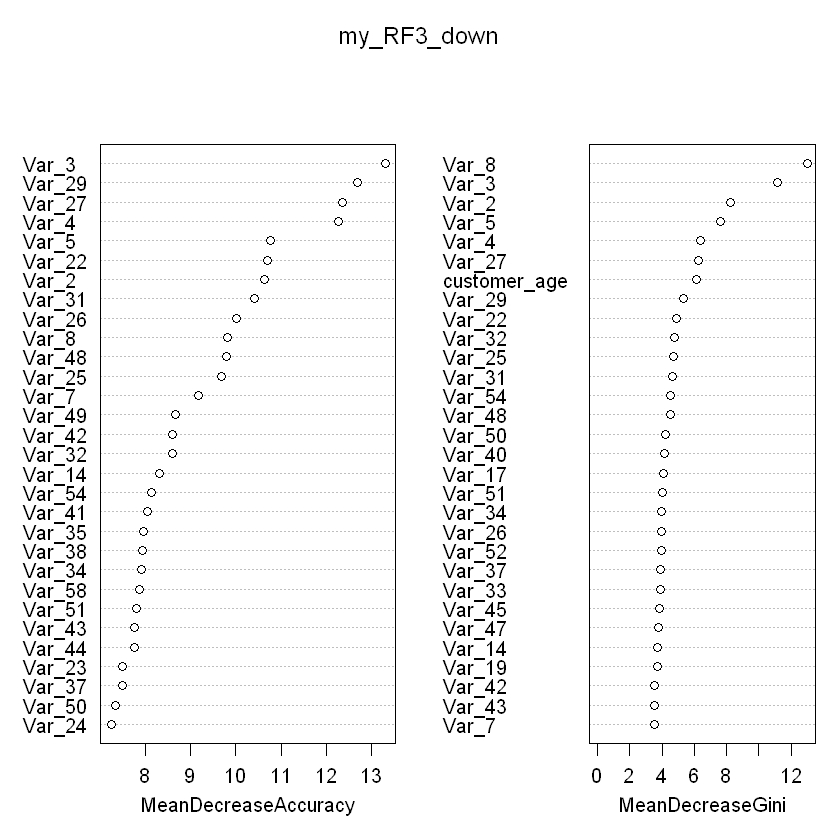

In [60]:
#model#3
down_RF3$bestTune
#check variable importance 



my_RF3_down=randomForest(as.factor(default) ~., data = alltrainsclall,
                    min.node.size=1, splitrule = "gini",
                    mtry = 10, 
                    importance=TRUE, localImp=TRUE) 



varImpPlot(my_RF3_down)

#### RF model was used to find the most importat features, permuation based features importance was used to select the most importat features. A dataset with less features was built and some of the models were trained and test on this reduced sets.

##### only use the first 10 variables based on importance (dec. in acc.)

####  ("Var_3", "Var_29","Var_27","Var_4","Var_5","Var_22","Var_2","Var_31","Var_26","Var_8")


In [19]:
reducedtrain = alltrainsclall[,c("Var_3", "Var_29","Var_27","Var_4","Var_5","Var_22","Var_2","Var_31","Var_26","Var_8","default")]
head(reducedtrain)
dim(reducedtrain)
reducedtest = alltestsclall[,c("Var_3", "Var_29","Var_27","Var_4","Var_5","Var_22","Var_2","Var_31","Var_26","Var_8","default")]
head(reducedtest)
dim(reducedtest)

Var_3,Var_29,Var_27,Var_4,Var_5,Var_22,Var_2,Var_31,Var_26,Var_8,default
-0.4178275,-0.4040428,-0.3338813,-0.6969520,-0.8225300,-0.60252377,-0.08541655,-0.61262124,-0.5859322,0.2738669,0
-0.6447236,-0.5243487,-1.0040224,-1.3437181,-1.0693197,-0.81006347,-0.58738504,-0.70642466,-0.7416762,0.8175137,0
0.0359649,-0.5243487,0.7709457,0.3693381,0.1152708,0.03739032,-0.08541655,0.05963660,0.2706603,-0.1375414,0
-0.4178275,0.2818303,0.9882888,0.5791001,0.5430396,0.60812451,-0.08541655,-0.06543463,0.3225750,0.2885601,0
-0.4178275,-0.5243487,-1.0040224,-0.6969520,-0.8883406,-0.81006347,-0.58738504,-0.70642466,-0.7416762,1.3464672,0
-0.6447236,-0.5243487,0.2094762,-0.1725470,-0.2795927,-0.46416396,-0.58738504,-0.55008562,-0.4821028,1.7358358,0


[1] 1287   11

Var_3,Var_29,Var_27,Var_4,Var_5,Var_22,Var_2,Var_31,Var_26,Var_8,default
0.0480011,0.7465261,0.03199358,-0.4029464,-0.6055596,-0.2229595,0.44790093,1.0967188,-0.1657945,-0.6983271,0
0.0480011,9.2140765,3.70155374,3.1117595,2.6606019,1.8205256,-0.09516309,8.9268668,4.3633236,0.3396766,0
-0.6604289,-0.4330888,-0.66329150,-1.0688907,-1.2867377,-0.2229595,-0.63822711,-0.2301036,-0.3785718,0.2462922,0
-0.6604289,-0.3341943,0.68865172,0.7809545,0.4598727,0.1825145,-0.63822711,0.1395112,0.1229748,2.0529215,0
-0.1881422,-0.5187634,2.40755095,1.8723632,1.4903729,-0.3269272,0.44790093,-0.3248766,-0.3177783,-0.6660018,0
3.1178643,-0.5243564,-0.99162057,0.8734468,0.5996016,-0.8467657,2.07709300,-0.3248766,-0.7737298,-1.1436990,1


[1] 428  11

In [63]:
#redo model RF with down sampling

#model#6

set.seed(123)
TC6 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


TC6$sampling <- "down"

RF6_grid <- expand.grid(mtry = c(1:10) ,min.node.size=c(1,5), splitrule = c("extratrees","gini"))


down_RF6 <- train(as.factor(default) ~., data = reducedtrain,
                  method = "ranger",  metric = "Total money lost" ,
                  tuneGrid = RF6_grid,
                  trControl = TC6,
                  maximize = FALSE) 


predicted_rf6  <-  predict(down_RF6  ,reducedtest[,-11])

table(predicted_rf6 ,  as.factor(reducedtest$default))

cm6 = confusionMatrix(predicted_rf6 , as.factor(reducedtest$default))
cm6

testcost6= calculate_cost_test (predicted_rf6 , reducedtest$default)
testcost6

#reduced features provides better results.


             
predicted_rf6   0   1
            0 253  16
            1 126  33

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 253  16
         1 126  33
                                          
               Accuracy : 0.6682          
                 95% CI : (0.6214, 0.7127)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1725          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6675          
            Specificity : 0.6735          
         Pos Pred Value : 0.9405          
         Neg Pred Value : 0.2075          
             Prevalence : 0.8855          
         Detection Rate : 0.5911          
   Detection Prevalence : 0.6285          
      Balanced Accuracy : 0.6705          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              115405.3

### 2.7.2. Decision tree models:
#### down_tr7: DC7_down_minbuck1 : 
Decision tree tuning with down sampling
#### DC8_down_minbuck3
Decision tree tuning with down sampling 
#### DC9_down_minbuck10
Decision tree tuning with down sampling 
#### DC10_up_minbuck1
Decision tree tuning with up sampling 
#### DC11_up_minbuck10
Decision tree tuning with up sampling
#### DC12_smote
Decision tree tuning with smote data 
#### DC13_down_reduced_features
Decision tree down sampling with a reduced feature set

####  down_tr7: DC7_down_minbuck1:

In [64]:
#try decision tree ----

#model#7
#option1 : down sampling
#full data all features
# Build down-sampled DC model

set.seed(123)
TC7 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


TC7$sampling <- "down"

Tr_grid7 <- expand.grid(cp=c(0.005,0.007,0.01,0.03,0.05,0.1))

down_tr7 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "rpart",  metric = "Total money lost" ,
                  tuneGrid = Tr_grid7,
                  control = rpart.control(minbucket=c(1)),
                  trControl = TC7,
                  maximize = FALSE) 


predicted_tr7  <-  predict(down_tr7  ,alltestsclall[,-61])

table(predicted_tr7 ,  as.factor(alltestsclall$default))

cm7 = confusionMatrix(predicted_tr7 , as.factor(alltestsclall$default))
cm7

testcost7= calculate_cost_test (predicted_tr7 ,  alltestsclall$default)
testcost7


             
predicted_tr7   0   1
            0 247  18
            1 132  31

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 247  18
         1 132  31
                                          
               Accuracy : 0.6495          
                 95% CI : (0.6023, 0.6947)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1413          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6517          
            Specificity : 0.6327          
         Pos Pred Value : 0.9321          
         Neg Pred Value : 0.1902          
             Prevalence : 0.8855          
         Detection Rate : 0.5771          
   Detection Prevalence : 0.6192          
      Balanced Accuracy : 0.6422          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              125898.4

####  DC8_down_minbuck3:

In [65]:

#model8 
#different minbucket

down_tr8 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "rpart",  metric = "Total money lost" ,
                  tuneGrid = Tr_grid7,
                  control = rpart.control(minbucket=c(3)),
                  trControl = TC7,
                  maximize = FALSE) 


predicted_tr8  <-  predict(down_tr8  ,alltestsclall[,-61])

table(predicted_tr8 ,  as.factor(alltestsclall$default))

cm8 = confusionMatrix(predicted_tr8 , as.factor(alltestsclall$default))
cm8

testcost8= calculate_cost_test (predicted_tr8 ,  alltestsclall$default)
testcost8



             
predicted_tr8   0   1
            0 245  17
            1 134  32

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 245  17
         1 134  32
                                          
               Accuracy : 0.6472          
                 95% CI : (0.5999, 0.6925)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1468          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6464          
            Specificity : 0.6531          
         Pos Pred Value : 0.9351          
         Neg Pred Value : 0.1928          
             Prevalence : 0.8855          
         Detection Rate : 0.5724          
   Detection Prevalence : 0.6121          
      Balanced Accuracy : 0.6497          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              120673.2

####  DC9_down_minbuck10:

In [66]:
#model9 
#different minbucket
set.seed(123)
down_tr9 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "rpart",  metric = "Total money lost" ,
                  tuneGrid = Tr_grid7,
                  control = rpart.control(minbucket=c(10)),
                  trControl = TC7,
                  maximize = FALSE) 


predicted_tr9  <-  predict(down_tr8  ,alltestsclall[,-61])

table(predicted_tr9 ,  as.factor(alltestsclall$default))

cm9 = confusionMatrix(predicted_tr9 , as.factor(alltestsclall$default))
cm9

testcost9= calculate_cost_test (predicted_tr9,  alltestsclall$default)
testcost9

             
predicted_tr9   0   1
            0 245  17
            1 134  32

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 245  17
         1 134  32
                                          
               Accuracy : 0.6472          
                 95% CI : (0.5999, 0.6925)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1468          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6464          
            Specificity : 0.6531          
         Pos Pred Value : 0.9351          
         Neg Pred Value : 0.1928          
             Prevalence : 0.8855          
         Detection Rate : 0.5724          
   Detection Prevalence : 0.6121          
      Balanced Accuracy : 0.6497          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              120673.2

####  DC10_up_minbuck1:

In [67]:
#option2 : "up" sampling

# Buil up-sampled model

#model10

set.seed(123)
TC10 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

TC10$sampling <- "up"

Tr_grid10 <- expand.grid(cp=c(0.005,0.007,0.01,0.03,0.05,0.1))


up_tr10 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "rpart",  metric = "Total money lost" ,
                  tuneGrid = Tr_grid10 ,
                  control = rpart.control(minbucket=c(1)),
                  trControl = TC10,
                  maximize = FALSE) 


predicted_up_tr10   <-  predict(up_tr10   ,alltestsclall[,-61])

table(predicted_up_tr10  ,  as.factor(alltestsclall$default))

cm10 = confusionMatrix(predicted_up_tr10 , as.factor(testSet$default))
cm10

testcost10= calculate_cost_test (predicted_up_tr10  ,  alltestsclall$default)
testcost10



                 
predicted_up_tr10   0   1
                0 276  25
                1 103  24

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 276  25
         1 103  24
                                         
               Accuracy : 0.7009         
                 95% CI : (0.6551, 0.744)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1288         
                                         
 Mcnemar's Test P-Value : 1.004e-11      
                                         
            Sensitivity : 0.7282         
            Specificity : 0.4898         
         Pos Pred Value : 0.9169         
         Neg Pred Value : 0.1890         
             Prevalence : 0.8855         
         Detection Rate : 0.6449         
   Detection Prevalence : 0.7033         
      Balanced Accuracy : 0.6090         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              132196.9

####  DC11_up_minbuck10

In [68]:

#model11
#another minbucket

set.seed(123)
TC10 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

TC10$sampling <- "up"

Tr_grid10 <- expand.grid(cp=c(0.005,0.007,0.01,0.03,0.05,0.1))


up_tr11 <- train(as.factor(default) ~., data = alltrainsclall,
                 method = "rpart",  metric = "Total money lost" ,
                 tuneGrid = Tr_grid10 ,
                 control = rpart.control(minbucket=c(10)),
                 trControl = TC10,
                 maximize = FALSE) 


predicted_up_tr11   <-  predict(up_tr11   ,alltestsclall[,-61])

table(predicted_up_tr11  ,  as.factor(alltestsclall$default))

cm11 = confusionMatrix(predicted_up_tr11 , as.factor(testSet$default))
cm11

testcost11= calculate_cost_test (predicted_up_tr11  ,  alltestsclall$default)
testcost11



                 
predicted_up_tr11   0   1
                0 276  25
                1 103  24

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 276  25
         1 103  24
                                         
               Accuracy : 0.7009         
                 95% CI : (0.6551, 0.744)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1288         
                                         
 Mcnemar's Test P-Value : 1.004e-11      
                                         
            Sensitivity : 0.7282         
            Specificity : 0.4898         
         Pos Pred Value : 0.9169         
         Neg Pred Value : 0.1890         
             Prevalence : 0.8855         
         Detection Rate : 0.6449         
   Detection Prevalence : 0.7033         
      Balanced Accuracy : 0.6090         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              132196.9

####  DC12_smote

In [ ]:
#option:3 create a synthetic data with smote to find the 
#first smote to balance the data out

#model12
#smote
#8 times larger 
#K=2 negihborhood for generation

#train on the smote generated dataset

set.seed(123)
TC12 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC12$sampling = NULL



smote_tr12 <- train(y =  as.factor(verynewtrain$default), x = as.matrix(verynewtrain [,-61], with = F),
                   method = "rpart",  metric = "Total money lost" ,
                   trControl = TC12,
                   tuneLength = 6,
                   maximize = FALSE) 



table(verynewtrain$default)


predicted_smote_tr12  <-  predict(smote_tr12  ,alltestsclall[,-61])

table(predicted_smote_tr12 ,  as.factor(alltestsclall$default))

cm12 = confusionMatrix(predicted_smote_tr12 , as.factor(alltestsclall$default))
cm12

testcost12= calculate_cost_test (predicted_smote_tr12 ,  alltestsclall$default)
testcost12

####  DC13_down_reduced_features:

In [73]:

#model13 
# fewer variables
set.seed(123)
Tr_grid13 <- expand.grid(cp=c(0.0001, 0.001,0.005,0.007,0.01,0.03,0.05,0.1))
TC7$sampling = "down"

down_tr13 <- train(as.factor(default) ~., data = reducedtrain,
                  method = "rpart",  metric = "Total money lost" ,
                  tuneGrid = Tr_grid13,
                  control = rpart.control(minbucket=c(3)),
                  trControl = TC7,
                  maximize = FALSE) 


predicted_tr13  <-  predict(down_tr13  ,reducedtest[,-11])

table(predicted_tr13 ,  as.factor(reducedtest$default))

cm13 = confusionMatrix(predicted_tr13 , as.factor(reducedtest$default))
cm13

testcost13= calculate_cost_test (predicted_tr13  ,  reducedtest$default)
testcost13


              
predicted_tr13   0   1
             0 247  18
             1 132  31

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 247  18
         1 132  31
                                          
               Accuracy : 0.6495          
                 95% CI : (0.6023, 0.6947)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1413          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6517          
            Specificity : 0.6327          
         Pos Pred Value : 0.9321          
         Neg Pred Value : 0.1902          
             Prevalence : 0.8855          
         Detection Rate : 0.5771          
   Detection Prevalence : 0.6192          
      Balanced Accuracy : 0.6422          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              125898.4

### 2.7.3 GBM models:
#### GBM14_up : 
GBM tuning with up sampling
#### GBM15_up_reduced_features:
GBM tuning with up sampling  with a reduced feature set
#### GBM16_down
GBM tuning with down sampling 
#### GBM17_down_reduced_features
GBM tuning with down sampling  with a reduced feature set
#### GBM18_smote
GBM tuning with smote data 
#### GBM19_smote_tune_length
GBM naive tuning with smote data 

####  GBM14_up:

In [80]:
#up
#model14
set.seed(123)

TC14 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC14$sampling <- "up"

gbm_Grid14=expand.grid(interaction.depth = c( 3, 5), 
                    n.trees = c(1:5)*100, 
                    shrinkage = c(0.05,0.1),
                    n.minobsinnode = c(1, 3, 5))



up_gbm14 <- train(as.factor(default) ~., data = alltrainsclall,
                 method = "gbm",  metric = "Total money lost" ,
                 tuneGrid = gbm_Grid14 ,
                 trControl = TC14,
                 maximize = FALSE) 



predicted_up_gbm14   <-  predict(up_gbm14   ,alltestsclall[,-61])

table(predicted_up_gbm14 ,  as.factor(alltestsclall$default))

cm14 = confusionMatrix(predicted_up_gbm14 , as.factor(testSet$default))
cm14

testcost14= calculate_cost_test (predicted_up_gbm14  ,  alltestsclall$default)
testcost14



Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3632             nan     0.0500    0.0106
     2        1.3411             nan     0.0500    0.0098
     3        1.3204             nan     0.0500    0.0106
     4        1.3016             nan     0.0500    0.0088
     5        1.2844             nan     0.0500    0.0086
     6        1.2668             nan     0.0500    0.0074
     7        1.2512             nan     0.0500    0.0073
     8        1.2364             nan     0.0500    0.0066
     9        1.2218             nan     0.0500    0.0064
    10        1.2097             nan     0.0500    0.0052
    20        1.0991             nan     0.0500    0.0044
    40        0.9651             nan     0.0500    0.0026
    60        0.8738             nan     0.0500    0.0016
    80        0.8035             nan     0.0500    0.0009
   100        0.7460             nan     0.0500    0.0015
   120        0.6963             nan     0.0500    0.0003
   140        

                  
predicted_up_gbm14   0   1
                 0 313  26
                 1  66  23

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 313  26
         1  66  23
                                         
               Accuracy : 0.785          
                 95% CI : (0.7431, 0.823)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2178         
                                         
 Mcnemar's Test P-Value : 4.782e-05      
                                         
            Sensitivity : 0.8259         
            Specificity : 0.4694         
         Pos Pred Value : 0.9233         
         Neg Pred Value : 0.2584         
             Prevalence : 0.8855         
         Detection Rate : 0.7313         
   Detection Prevalence : 0.7921         
      Balanced Accuracy : 0.6476         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              121274.9

####  GBM15_up_reduced_features:

In [81]:
set.seed(123)
#up with reduced feature set
#model15

up_gbm15 <- train(as.factor(default) ~., data = reducedtrain,
                  method = "gbm",  metric = "Total money lost" ,
                  tuneGrid = gbm_Grid14 ,
                  trControl = TC14,
                  maximize = FALSE) 


predicted_up_gbm15   <-  predict(up_gbm15,reducedtest[,-11])

table(predicted_up_gbm15 ,  as.factor(reducedtest$default))

cm15 = confusionMatrix(predicted_up_gbm15 , as.factor(reducedtest$default))
cm15

testcost15= calculate_cost_test (predicted_up_gbm15 ,  reducedtest$default)
testcost15


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3632             nan     0.0500    0.0106
     2        1.3409             nan     0.0500    0.0102
     3        1.3204             nan     0.0500    0.0105
     4        1.3024             nan     0.0500    0.0080
     5        1.2852             nan     0.0500    0.0091
     6        1.2679             nan     0.0500    0.0072
     7        1.2513             nan     0.0500    0.0081
     8        1.2366             nan     0.0500    0.0065
     9        1.2240             nan     0.0500    0.0058
    10        1.2123             nan     0.0500    0.0051
    20        1.1106             nan     0.0500    0.0040
    40        0.9984             nan     0.0500    0.0019
    60        0.9258             nan     0.0500    0.0008
    80        0.8800             nan     0.0500    0.0003
   100        0.8405             nan     0.0500    0.0014
   120        0.8059             nan     0.0500    0.0004
   140        

                  
predicted_up_gbm15   0   1
                 0 294  26
                 1  85  23

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 294  26
         1  85  23
                                          
               Accuracy : 0.7407          
                 95% CI : (0.6964, 0.7816)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1608          
                                          
 Mcnemar's Test P-Value : 3.689e-08       
                                          
            Sensitivity : 0.7757          
            Specificity : 0.4694          
         Pos Pred Value : 0.9187          
         Neg Pred Value : 0.2130          
             Prevalence : 0.8855          
         Detection Rate : 0.6869          
   Detection Prevalence : 0.7477          
      Balanced Accuracy : 0.6226          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              129976.1

####  GBM16_down

In [82]:
set.seed(123)
#gbm down
#model16
TC16 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC16$sampling <- "down"

gbm_Grid16=expand.grid(interaction.depth = c( 3, 5), 
                       n.trees = c(1:5)*100, 
                       shrinkage = c(0.05,0.1),
                       n.minobsinnode = c(1, 3, 5))



down_gbm16 <- train(as.factor(default) ~., data = alltrainsclall,
                  method = "gbm",  metric = "Total money lost" ,
                  tuneGrid = gbm_Grid16 ,
                  trControl = TC16,
                  maximize = FALSE) 



predicted_down_gbm16  <-  predict(down_gbm16   ,alltestsclall[,-61])

table(predicted_down_gbm16 ,  as.factor(alltestsclall$default))

cm16 = confusionMatrix(predicted_down_gbm16 , as.factor(testSet$default))
cm16

testcost16= calculate_cost_test (predicted_down_gbm16  ,  alltestsclall$default)
testcost16

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3578             nan     0.0500    0.0064
     2        1.3381             nan     0.0500    0.0072
     3        1.3159             nan     0.0500    0.0063
     4        1.2955             nan     0.0500    0.0051
     5        1.2763             nan     0.0500    0.0042
     6        1.2617             nan     0.0500    0.0031
     7        1.2424             nan     0.0500    0.0025
     8        1.2224             nan     0.0500    0.0032
     9        1.2075             nan     0.0500    0.0025
    10        1.1938             nan     0.0500    0.0009
    20        1.0875             nan     0.0500    0.0029
    40        0.9455             nan     0.0500   -0.0017
    60        0.8182             nan     0.0500   -0.0014
    80        0.7346             nan     0.0500   -0.0014
   100        0.6659             nan     0.0500   -0.0012
   120        0.6029             nan     0.0500    0.0007
   140        

                    
predicted_down_gbm16   0   1
                   0 247  18
                   1 132  31

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 247  18
         1 132  31
                                          
               Accuracy : 0.6495          
                 95% CI : (0.6023, 0.6947)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1413          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6517          
            Specificity : 0.6327          
         Pos Pred Value : 0.9321          
         Neg Pred Value : 0.1902          
             Prevalence : 0.8855          
         Detection Rate : 0.5771          
   Detection Prevalence : 0.6192          
      Balanced Accuracy : 0.6422          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              126099.8

#### GBM17_down_reduced_features:

In [83]:
set.seed(123)
#model17 gbm
#down and reduced

down_gbm17 <- train(as.factor(default) ~., data = reducedtrain,
                  method = "gbm",  metric = "Total money lost" ,
                  tuneGrid = gbm_Grid16 ,
                  trControl = TC16,
                  maximize = FALSE) 


predicted_down_gbm17    <-  predict(down_gbm17,reducedtest[,-11])

table(predicted_down_gbm17,  as.factor(reducedtest$default))

cm17 = confusionMatrix(predicted_down_gbm17 , as.factor(reducedtest$default))
cm17

testcost17= calculate_cost_test (predicted_down_gbm17 ,  reducedtest$default)
testcost17


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3576             nan     0.0500    0.0074
     2        1.3381             nan     0.0500    0.0081
     3        1.3200             nan     0.0500    0.0030
     4        1.3002             nan     0.0500    0.0054
     5        1.2806             nan     0.0500    0.0041
     6        1.2684             nan     0.0500    0.0018
     7        1.2530             nan     0.0500    0.0008
     8        1.2365             nan     0.0500    0.0051
     9        1.2163             nan     0.0500    0.0060
    10        1.2042             nan     0.0500    0.0010
    20        1.0971             nan     0.0500    0.0017
    40        0.9740             nan     0.0500   -0.0045
    60        0.8887             nan     0.0500   -0.0030
    80        0.8172             nan     0.0500    0.0002
   100        0.7632             nan     0.0500   -0.0018
   120        0.7122             nan     0.0500   -0.0003
   140        

                    
predicted_down_gbm17   0   1
                   0 258  20
                   1 121  29

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 258  20
         1 121  29
                                          
               Accuracy : 0.6706          
                 95% CI : (0.6238, 0.7149)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1437          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6807          
            Specificity : 0.5918          
         Pos Pred Value : 0.9281          
         Neg Pred Value : 0.1933          
             Prevalence : 0.8855          
         Detection Rate : 0.6028          
   Detection Prevalence : 0.6495          
      Balanced Accuracy : 0.6363          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                126084

#### GBM18_smote:

In [84]:
#gbm smote

#train on the smote generated dataset

set.seed(123)
TC18 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

gbm_Grid18=expand.grid(interaction.depth = c( 3, 5), 
                       n.trees = c(1:5)*100, 
                       shrinkage = c(0.05,0.1),
                       n.minobsinnode = c(1, 3, 5))



smote_gbm18 <- train(as.factor(default) ~., data = verynewtrain,
                    method = "gbm",  metric = "Total money lost" ,
                    tuneGrid = gbm_Grid18,
                    trControl = TC18,
                    maximize = FALSE) 


predicted_smote_gbm18  <-  predict(smote_gbm18  ,alltestsclall[,-61])

table(predicted_smote_gbm18 ,  as.factor(alltestsclall$default))

cm18 = confusionMatrix(predicted_smote_gbm18 , as.factor(alltestsclall$default))
cm18

testcost18= calculate_cost_test (predicted_smote_gbm18,  alltestsclall$default)
testcost18


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3556             nan     0.0500    0.0154
     2        1.3284             nan     0.0500    0.0135
     3        1.3018             nan     0.0500    0.0130
     4        1.2776             nan     0.0500    0.0117
     5        1.2546             nan     0.0500    0.0110
     6        1.2328             nan     0.0500    0.0098
     7        1.2143             nan     0.0500    0.0090
     8        1.1939             nan     0.0500    0.0094
     9        1.1764             nan     0.0500    0.0082
    10        1.1588             nan     0.0500    0.0074
    20        1.0274             nan     0.0500    0.0043
    40        0.8657             nan     0.0500    0.0035
    60        0.7599             nan     0.0500    0.0010
    80        0.6811             nan     0.0500    0.0006
   100        0.6229             nan     0.0500    0.0006
   120        0.5749             nan     0.0500    0.0005
   140        

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in train.default(x, y, weights = w, ...):
"missing values found in aggregated results"

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3170             nan     0.1000    0.0324
     2        1.2582             nan     0.1000    0.0264
     3        1.2055             nan     0.1000    0.0244
     4        1.1621             nan     0.1000    0.0214
     5        1.1235             nan     0.1000    0.0186
     6        1.0862             nan     0.1000    0.0169
     7        1.0461             nan     0.1000    0.0201
     8        1.0151             nan     0.1000    0.0139
     9        0.9882             nan     0.1000    0.0125
    10        0.9544             nan     0.1000    0.0161
    20        0.7635             nan     0.1000    0.0058
    40        0.5570             nan     0.1000    0.0018
    60        0.4356             nan     0.1000    0.0019
    80        0.3634             nan     0.1000    0.0005
   100        0.3146             nan     0.1000   -0.0001
   120        0.2766             nan     0.1000    0.0002
   140        

                     
predicted_smote_gbm18   0   1
                    0 213  13
                    1 166  36

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 213  13
         1 166  36
                                         
               Accuracy : 0.5818         
                 95% CI : (0.5334, 0.629)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1258         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.5620         
            Specificity : 0.7347         
         Pos Pred Value : 0.9425         
         Neg Pred Value : 0.1782         
             Prevalence : 0.8855         
         Detection Rate : 0.4977         
   Detection Prevalence : 0.5280         
      Balanced Accuracy : 0.6483         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              117241.6

#### GBM19_smote_tune_length:

In [85]:
#gbm smote different tuning

set.seed(123)
TC19 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)



smote_gbm19 <- train(as.factor(default) ~., data = verynewtrain,
                     method = "gbm",  metric = "Total money lost" ,
                     tuneLength = 6,
                     trControl = TC19,
                     maximize = FALSE) 


predicted_smote_gbm19  <-  predict(smote_gbm19  ,alltestsclall[,-61])

table(predicted_smote_gbm19 ,  as.factor(alltestsclall$default))

cm19 = confusionMatrix(predicted_smote_gbm19 , as.factor(alltestsclall$default))
cm19

testcost19= calculate_cost_test (predicted_smote_gbm19,  alltestsclall$default)
testcost19


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3443             nan     0.1000    0.0218
     2        1.3125             nan     0.1000    0.0154
     3        1.2794             nan     0.1000    0.0170
     4        1.2527             nan     0.1000    0.0137
     5        1.2299             nan     0.1000    0.0106
     6        1.2096             nan     0.1000    0.0090
     7        1.1937             nan     0.1000    0.0075
     8        1.1752             nan     0.1000    0.0081
     9        1.1608             nan     0.1000    0.0065
    10        1.1460             nan     0.1000    0.0065
    20        1.0527             nan     0.1000    0.0022
    40        0.9435             nan     0.1000    0.0011
    60        0.8747             nan     0.1000    0.0009
    80        0.8228             nan     0.1000    0.0005
   100        0.7795             nan     0.1000    0.0004
   120        0.7438             nan     0.1000    0.0006
   140        

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in train.default(x, y, weights = w, ...):
"missing values found in aggregated results"

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3125             nan     0.1000    0.0347
     2        1.2490             nan     0.1000    0.0287
     3        1.1934             nan     0.1000    0.0257
     4        1.1476             nan     0.1000    0.0203
     5        1.1001             nan     0.1000    0.0219
     6        1.0606             nan     0.1000    0.0167
     7        1.0261             nan     0.1000    0.0161
     8        0.9910             nan     0.1000    0.0174
     9        0.9639             nan     0.1000    0.0117
    10        0.9340             nan     0.1000    0.0138
    20        0.7295             nan     0.1000    0.0065
    40        0.5038             nan     0.1000    0.0018
    60        0.3929             nan     0.1000    0.0010
    80        0.3187             nan     0.1000    0.0001
   100        0.2678             nan     0.1000   -0.0003
   120        0.2299             nan     0.1000    0.0007
   140        

                     
predicted_smote_gbm19   0   1
                    0 230  15
                    1 149  34

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 230  15
         1 149  34
                                          
               Accuracy : 0.6168          
                 95% CI : (0.5689, 0.6631)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1373          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6069          
            Specificity : 0.6939          
         Pos Pred Value : 0.9388          
         Neg Pred Value : 0.1858          
             Prevalence : 0.8855          
         Detection Rate : 0.5374          
   Detection Prevalence : 0.5724          
      Balanced Accuracy : 0.6504          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                114906

### 2.7.4. Penalized_Log_Reg models:
#### LR20_down : 
Penalized_Log_Reg tuning with down sampling
#### LR21_down_reduced_features
Penalized_Log_Reg tuning with down sampling  with reduced_features
#### LR22_down_tune_length
Penalized_Log_Reg tuning with down sampling
#### LR23_up
Penalized_Log_Reg tuning with up sampling
#### LR24_smote
Penalized_Log_Reg tuning with smote data 

####  LR20_down:

In [65]:

#log-reg----
#down
set.seed(123)
TC20 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC20$sampling <- "down"

log_grid20 <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))



log_reg20 <- train(as.factor(default) ~., data = alltrainsclall,
                    method = "glmnet",  metric = "Total money lost" ,
                    tuneGrid = log_grid20 ,
                    trControl = TC20,
                    maximize = FALSE) 

predicted_log_reg20  <-  predict(log_reg20  ,alltestsclall[,-61])

table(predicted_log_reg20 ,  as.factor(alltestsclall$default))

cm20 = confusionMatrix(predicted_log_reg20 , as.factor(alltestsclall$default))
cm20

testcost20= calculate_cost_test (predicted_log_reg20,  alltestsclall$default)
testcost20


                   
predicted_log_reg20   0   1
                  0 230  11
                  1 149  38

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 230  11
         1 149  38
                                          
               Accuracy : 0.6262          
                 95% CI : (0.5784, 0.6722)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1718          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6069          
            Specificity : 0.7755          
         Pos Pred Value : 0.9544          
         Neg Pred Value : 0.2032          
             Prevalence : 0.8855          
         Detection Rate : 0.5374          
   Detection Prevalence : 0.5631          
      Balanced Accuracy : 0.6912          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              106524.9

####  LR21_down_reduced_features:

In [87]:

#down with reduced 
set.seed(123)
TC21 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC21$sampling <- "down"

log_grid21 <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))



log_reg21 <- train(as.factor(default) ~., data = reducedtrain,
                   method = "glmnet",  metric = "Total money lost" ,
                   tuneGrid = log_grid21 ,
                   trControl = TC21,
                   maximize = FALSE) 

predicted_log_reg21  <-  predict(log_reg21  ,reducedtest[,-11])

table(predicted_log_reg21 ,  as.factor(reducedtest$default))

cm21 = confusionMatrix(predicted_log_reg21 , as.factor(reducedtest$default))
cm21

testcost21= calculate_cost_test (predicted_log_reg21,  reducedtest$default)
testcost21


                   
predicted_log_reg21   0   1
                  0 256  19
                  1 123  30

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 256  19
         1 123  30
                                          
               Accuracy : 0.6682          
                 95% CI : (0.6214, 0.7127)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1495          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6755          
            Specificity : 0.6122          
         Pos Pred Value : 0.9309          
         Neg Pred Value : 0.1961          
             Prevalence : 0.8855          
         Detection Rate : 0.5981          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.6439          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              124934.5

####  LR22_down_tune_length:

In [52]:
#down with tuneleght
set.seed(123)
TC22 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC22$sampling <- "down"



log_reg22 <- train(as.factor(default) ~., data = alltrainsclall,
                   method = "glmnet",  metric = "Total money lost" ,
                   tuneLength = 22 ,
                   trControl = TC22,
                   maximize = FALSE) 

predicted_log_reg22  <-  predict(log_reg22  ,alltestsclall[,-61])

table(predicted_log_reg22 ,  as.factor(alltestsclall$default))

cm22 = confusionMatrix(predicted_log_reg22 , as.factor(alltestsclall$default))
cm22

testcost22= calculate_cost_test (predicted_log_reg22,  alltestsclall$default)
testcost22

                   
predicted_log_reg22   0   1
                  0 268  15
                  1 111  34

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 268  15
         1 111  34
                                          
               Accuracy : 0.7056          
                 95% CI : (0.6599, 0.7484)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2164          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7071          
            Specificity : 0.6939          
         Pos Pred Value : 0.9470          
         Neg Pred Value : 0.2345          
             Prevalence : 0.8855          
         Detection Rate : 0.6262          
   Detection Prevalence : 0.6612          
      Balanced Accuracy : 0.7005          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              100925.4

####  LR23_up:

In [62]:

#logreg up
set.seed(123)
TC23 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC23$sampling <- "up"

log_grid23 <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))



log_reg23 <- train(as.factor(default) ~., data = alltrainsclall,
                   method = "glmnet",  metric = "Total money lost" ,
                   tuneGrid = log_grid23 ,
                   trControl = TC23,
                   maximize = FALSE) 

predicted_log_reg23  <-  predict(log_reg23  ,alltestsclall[,-61])

table(predicted_log_reg23 ,  as.factor(alltestsclall$default))

cm23 = confusionMatrix(predicted_log_reg23 , as.factor(alltestsclall$default))
cm23

testcost23= calculate_cost_test (predicted_log_reg23,  alltestsclall$default)
testcost23

                   
predicted_log_reg23   0   1
                  0 274  17
                  1 105  32

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 274  17
         1 105  32
                                          
               Accuracy : 0.715           
                 95% CI : (0.6696, 0.7573)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.211           
                                          
 Mcnemar's Test P-Value : 3.364e-15       
                                          
            Sensitivity : 0.7230          
            Specificity : 0.6531          
         Pos Pred Value : 0.9416          
         Neg Pred Value : 0.2336          
             Prevalence : 0.8855          
         Detection Rate : 0.6402          
   Detection Prevalence : 0.6799          
      Balanced Accuracy : 0.6880          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                104266

####  LR24_smote:

In [57]:
#logreg smote data
set.seed(123)
TC24 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


log_grid24 <- expand.grid(alpha = 1, lambda= seq( from = 0.001, to =0.003, by = 0.00003))


###
all  = alltrainsclall

all$default = ifelse (all$default == 1 , "y", "n")

alltest  = alltestsclall

alltest$default = ifelse (alltest$default == 1 , "y", "n")
###


log_reg24 <- train(as.factor(default) ~., data = all,
                   method = "glmnet",  metric = "Total money lost" ,
                   tuneGrid = log_grid24 ,
                   trControl = TC24,
                   maximize = FALSE) 

predicted_log_reg24  <-  predict(log_reg24  ,alltestsclall[,-61])

table(predicted_log_reg24 ,  as.factor(alltestsclall$default))

cm24 = confusionMatrix(predicted_log_reg24 , as.factor(alltest$default))
cm24

predicted_log_reg24 = ifelse (predicted_log_reg24 == "y" , 1, 0)
alltest$default = ifelse (alltest$default == "y" , 1, 0)

testcost24= calculate_cost_test (as.factor(predicted_log_reg24),  as.factor(alltest$default))
testcost24



                   
predicted_log_reg24   0   1
                  n 376  46
                  y   3   3

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 376  46
         y   3   3
                                          
               Accuracy : 0.8855          
                 95% CI : (0.8515, 0.9141)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.538           
                                          
                  Kappa : 0.0863          
                                          
 Mcnemar's Test P-Value : 1.973e-09       
                                          
            Sensitivity : 0.99208         
            Specificity : 0.06122         
         Pos Pred Value : 0.89100         
         Neg Pred Value : 0.50000         
             Prevalence : 0.88551         
         Detection Rate : 0.87850         
   Detection Prevalence : 0.98598         
      Balanced Accuracy : 0.52665         
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
                160533

### 2.7.5. SVM models:
#### Lin_svm25_down : 
Linear SVM tuning with down sampling
#### Poly_svm26_down:
Polynamial SVM tuning with down sampling
#### Rad_svm27_down:
Radial SVM tuning with down sampling
#### Rad_svm28_down_reduced_features
Radial SVM tuning with down sampling with reduced number of features
#### Rad_svm29_up
Radial SVM tuning with up sampling 
#### Rad_svm30_smote
Radial SVM tuning with smote



####  Lin_svm25_down:

In [91]:
#linear svm and down
set.seed(123)
TC25 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC25$sampling <- "down"


Lin_svm_down25 <- train(as.factor(default) ~., data = alltrainsclall,
                   method ="svmLinear",  metric = "Total money lost" ,
                   tuneLength = 10,
                   trControl = TC25,
                   maximize = FALSE) 

predicted_Lin_svm_down25  <-  predict(Lin_svm_down25  ,alltestsclall[,-61])

table(predicted_Lin_svm_down25,  as.factor(alltestsclall$default))

cm25 = confusionMatrix(predicted_Lin_svm_down25 , as.factor(alltestsclall$default))
cm25

testcost25= calculate_cost_test (predicted_Lin_svm_down25,  alltestsclall$default)
testcost25

                        
predicted_Lin_svm_down25   0   1
                       0 178  14
                       1 201  35

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 178  14
         1 201  35
                                          
               Accuracy : 0.4977          
                 95% CI : (0.4493, 0.5461)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0691          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.4697          
            Specificity : 0.7143          
         Pos Pred Value : 0.9271          
         Neg Pred Value : 0.1483          
             Prevalence : 0.8855          
         Detection Rate : 0.4159          
   Detection Prevalence : 0.4486          
      Balanced Accuracy : 0.5920          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              138772.3

#### Poly_svm26_down:

In [ ]:

#polysvm 
set.seed(123)
TC26 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC26$sampling <- "down"


Poly_svm_down26 <- train(as.factor(default) ~., data = alltrainsclall,
                        method ="svmPoly",  metric = "Total money lost" ,
                        tuneLength = 10,
                        trControl = TC26,
                        maximize = FALSE) 

predicted_Lin_svm_down26  <-  predict(Lin_svm_down26  ,alltestsclall[,-61])

table(predicted_Lin_svm_down26,  as.factor(alltestsclall$default))

cm26 = confusionMatrix(predicted_Lin_svm_down26 , as.factor(alltestsclall$default))
cm26

testcost26= calculate_cost_test (predicted_Lin_svm_down26,  alltestsclall$default)
testcost26



####  Rad_svm27_down:

In [53]:

#radialsvm 
set.seed(123)
TC27 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC27$sampling <- "down"


Rad_svm_down27 <- train(as.factor(default) ~., data = alltrainsclall,
                         method ="svmRadial",  metric = "Total money lost" ,
                         tuneLength = 10,
                         trControl = TC27,
                         maximize = FALSE) 

predicted_Rad_svm_down27 <-  predict(Rad_svm_down27  ,alltestsclall[,-61])

table(predicted_Rad_svm_down27,  as.factor(alltestsclall$default))

cm27 = confusionMatrix(predicted_Rad_svm_down27 , as.factor(alltestsclall$default))
cm27

testcost27= calculate_cost_test (predicted_Rad_svm_down27,  alltestsclall$default)
testcost27

                        
predicted_Rad_svm_down27   0   1
                       0 264  16
                       1 115  33

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 264  16
         1 115  33
                                          
               Accuracy : 0.6939          
                 95% CI : (0.6479, 0.7373)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1969          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6966          
            Specificity : 0.6735          
         Pos Pred Value : 0.9429          
         Neg Pred Value : 0.2230          
             Prevalence : 0.8855          
         Detection Rate : 0.6168          
   Detection Prevalence : 0.6542          
      Balanced Accuracy : 0.6850          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              105869.7

#### Rad_svm28_down_reduced_features:

In [20]:
#radial down and less features

set.seed(123)

Rad_svm_red_down28 <- train(as.factor(default) ~., data = reducedtrain,
                        method ="svmRadial",  metric = "Total money lost" ,
                        tuneLength = 10,
                        trControl = TC27,
                        maximize = FALSE) 

predicted_Rad_svm_red_down28 <-  predict(Rad_svm_red_down28  ,reducedtest[,-11])

table(predicted_Rad_svm_red_down28,  as.factor(reducedtest$default))

cm28 = confusionMatrix(predicted_Rad_svm_red_down28 , as.factor(reducedtest$default))
cm28

testcost28= calculate_cost_test (predicted_Rad_svm_red_down28,  reducedtest$default)
testcost28

                            
predicted_Rad_svm_red_down28   0   1
                           0 264  22
                           1 115  27

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 264  22
         1 115  27
                                          
               Accuracy : 0.6799          
                 95% CI : (0.6334, 0.7239)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1356          
                                          
 Mcnemar's Test P-Value : 3.839e-15       
                                          
            Sensitivity : 0.6966          
            Specificity : 0.5510          
         Pos Pred Value : 0.9231          
         Neg Pred Value : 0.1901          
             Prevalence : 0.8855          
         Detection Rate : 0.6168          
   Detection Prevalence : 0.6682          
      Balanced Accuracy : 0.6238          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              130731.4

####  Rad_svm29_up:

In [21]:
#rad svm up


set.seed(123)
TC29 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC29$sampling <- "up"


Rad_svm_up29 <- train(as.factor(default) ~., data = alltrainsclall,
                        method ="svmRadial",  metric = "Total money lost" ,
                        tuneLength = 10,
                        trControl = TC29,
                        maximize = FALSE) 

predicted_Rad_svm_up29 <-  predict(Rad_svm_up29  ,alltestsclall[,-61])

table(predicted_Rad_svm_up29,  as.factor(alltestsclall$default))

cm29 = confusionMatrix(predicted_Rad_svm_up29 , as.factor(alltestsclall$default))
cm29

testcost29= calculate_cost_test (predicted_Rad_svm_up29,  alltestsclall$default)
testcost29


                      
predicted_Rad_svm_up29   0   1
                     0 346  39
                     1  33  10

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 346  39
         1  33  10
                                         
               Accuracy : 0.8318         
                 95% CI : (0.7929, 0.866)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 0.9996         
                                         
                  Kappa : 0.1236         
                                         
 Mcnemar's Test P-Value : 0.5557         
                                         
            Sensitivity : 0.9129         
            Specificity : 0.2041         
         Pos Pred Value : 0.8987         
         Neg Pred Value : 0.2326         
             Prevalence : 0.8855         
         Detection Rate : 0.8084         
   Detection Prevalence : 0.8995         
      Balanced Accuracy : 0.5585         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              152119.9

#### Rad_svm30_smote:

In [ ]:
#rad svm smote

set.seed(123)
TC30 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)



Rad_svm_smote30 <- train(as.factor(default) ~., data = verynewtrain,
                      method ="svmRadial",  metric = "Total money lost" ,
                      tuneLength = 10,
                      trControl = TC29,
                      maximize = FALSE) 

predicted_Rad_svm_smote30<-  predict(Rad_svm_smote30  ,alltestsclall[,-61])

table(predicted_Rad_svm_smote30,  as.factor(alltestsclall$default))

cm30 = confusionMatrix(predicted_Rad_svm_smote30 , as.factor(alltestsclall$default))
cm30

testcost30= calculate_cost_test (predicted_Rad_svm_smote30,  alltestsclall$default)
testcost30


### 2.7.6. Weighted Models:

*Try to put additional class weights

*Add inverse wieghts on the classes

*Add weights

#### RF31_weights:
Random Forest model with weights
#### LR32_classweights:
Penalized Logistic Regressin model with weights
#### Rad_svm33_classweights:
Radial SVM model with classweights
#### Rad_svm34_modelweights:
Radial SVM model with instanceweights


####  RF31_weights:

In [27]:
#modelweight 

prop.table(table(alltrainsclall$default))

model_weights <- ifelse (alltrainsclall$default == "1",
                        (1/table(alltrainsclall$default)[1]) * 0.9044289,
                        (1/table(alltrainsclall$default)[2]) * 0.0955711)





        0         1 
0.9044289 0.0955711 

In [28]:
#setting of  down_RF6,but add inverse weights
#model31
set.seed(123)
TC31 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

RF31_grid <- expand.grid(mtry = c(7) ,min.node.size=c(5), splitrule = c("extratrees"))


w_RF31 <- train(as.factor(default) ~., data = reducedtrain,
                  method = "ranger",  metric = "Total money lost" ,
                  tuneGrid = RF31_grid,
                  trControl = TC31,
                  weights= model_weights ,
                  maximize = FALSE) 



predicted_w_RF31<-  predict(w_RF31  ,reducedtest[,-11])

table(predicted_w_RF31,  as.factor(reducedtest$default))

cm31 = confusionMatrix(predicted_w_RF31 , as.factor(reducedtest$default))
cm31

testcost31= calculate_cost_test (predicted_w_RF31,  reducedtest$default)
testcost31


                
predicted_w_RF31   0   1
               0 376  43
               1   3   6

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 376  43
         1   3   6
                                          
               Accuracy : 0.8925          
                 95% CI : (0.8593, 0.9202)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.3584          
                                          
                  Kappa : 0.1777          
                                          
 Mcnemar's Test P-Value : 8.912e-09       
                                          
            Sensitivity : 0.9921          
            Specificity : 0.1224          
         Pos Pred Value : 0.8974          
         Neg Pred Value : 0.6667          
             Prevalence : 0.8855          
         Detection Rate : 0.8785          
   Detection Prevalence : 0.9790          
      Balanced Accuracy : 0.5573          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              150811.6

####  LR32_classweights:

In [31]:
#model32
#logreg20 with class weights

set.seed(123)
TC32 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


log_grid32 <- expand.grid(alpha = 1, lambda= c(0.00229))



log_reg32 <- train(as.factor(default) ~., data = alltrainsclall,
                   method = "glmnet",  metric = "Total money lost" ,
                   tuneGrid = log_grid32,
                   trControl = TC32,
                   class.weights = "inverse",
                   maximize = FALSE) 


predicted_log_reg32 <-  predict(log_reg32  ,alltestsclall[,-61])

table(predicted_log_reg32 ,  as.factor(alltestsclall$default))

cm32 = confusionMatrix(predicted_log_reg32 , as.factor(alltestsclall$default))
cm32

testcost32= calculate_cost_test (predicted_log_reg32,  alltestsclall$default)
testcost32


                   
predicted_log_reg32   0   1
                  0 377  46
                  1   2   3

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 377  46
         1   2   3
                                          
               Accuracy : 0.8879          
                 95% CI : (0.8541, 0.9161)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.4775          
                                          
                  Kappa : 0.0919          
                                          
 Mcnemar's Test P-Value : 5.417e-10       
                                          
            Sensitivity : 0.99472         
            Specificity : 0.06122         
         Pos Pred Value : 0.89125         
         Neg Pred Value : 0.60000         
             Prevalence : 0.88551         
         Detection Rate : 0.88084         
   Detection Prevalence : 0.98832         
      Balanced Accuracy : 0.52797         
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              160164.2

####  Rad_svm33_classweights:

In [32]:

#radialsvm with class weights
set.seed(123)
TC33 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)



w_Rad_svm33 <- train(as.factor(default) ~., data = alltrainsclall,
                        method ="svmRadial",  metric = "Total money lost" ,
                        tuneLength = 10,
                        trControl = TC33,
                        class.weights = "inverse",
                        maximize = FALSE) 

predicted_w_Rad_svm33 <-  predict(w_Rad_svm33 ,alltestsclall[,-61])

table(predicted_w_Rad_svm33,  as.factor(alltestsclall$default))

cm33 = confusionMatrix(predicted_w_Rad_svm33 , as.factor(alltestsclall$default))
cm33

testcost33= calculate_cost_test (predicted_w_Rad_svm33,  alltestsclall$default)
testcost33

                     
predicted_w_Rad_svm33   0   1
                    0 342  38
                    1  37  11

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 342  38
         1  37  11
                                          
               Accuracy : 0.8248          
                 95% CI : (0.7854, 0.8596)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.9999          
                                          
                  Kappa : 0.128           
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.9024          
            Specificity : 0.2245          
         Pos Pred Value : 0.9000          
         Neg Pred Value : 0.2292          
             Prevalence : 0.8855          
         Detection Rate : 0.7991          
   Detection Prevalence : 0.8879          
      Balanced Accuracy : 0.5634          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              150477.8

####  Rad_svm34_modelweights:

In [33]:

#radialsvm with  weights

set.seed(123)
TC34 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)


wm_Rad_svm34 <- train(as.factor(default) ~., data = alltrainsclall,
                     method ="svmRadial",  metric = "Total money lost" ,
                     tuneLength = 10,
                     trControl = TC34,
                     weigths = model.weights,
                     maximize = FALSE) 

predicted_wm_Rad_svm34 <-  predict(wm_Rad_svm34 ,alltestsclall[,-61])

table(predicted_wm_Rad_svm34,  as.factor(alltestsclall$default))

cm34 = confusionMatrix(predicted_wm_Rad_svm34 , as.factor(alltestsclall$default))
cm34

testcost34= calculate_cost_test (predicted_wm_Rad_svm34,  alltestsclall$default)
testcost34

                      
predicted_wm_Rad_svm34   0   1
                     0 346  36
                     1  33  13

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 346  36
         1  33  13
                                          
               Accuracy : 0.8388          
                 95% CI : (0.8005, 0.8723)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 0.9985          
                                          
                  Kappa : 0.1831          
                                          
 Mcnemar's Test P-Value : 0.8097          
                                          
            Sensitivity : 0.9129          
            Specificity : 0.2653          
         Pos Pred Value : 0.9058          
         Neg Pred Value : 0.2826          
             Prevalence : 0.8855          
         Detection Rate : 0.8084          
   Detection Prevalence : 0.8925          
      Balanced Accuracy : 0.5891          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
              140872.3

### 2.8.7. KNN Models:

#### knn35_reduced_features:
Knn model tuning no sampling with reduced number of fetures


#### knn36_down_reduced_features:
Knn model tuning down sampling with reduced number of fetures



####  knn35_reduced_features:

In [34]:
#knn---
#reduced set
set.seed(123)
TC35 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

knn35 <- train(as.factor(default) ~., data = reducedtrain,
                   method     = "kknn",
                   tuneGrid   = expand.grid(kmax = 1:5, distance = c(1,2) , kernel= c("rectangular", "optimal", "inv")),
                   trControl  = TC35,
                   metric     = "Total money lost",
                   maximize = FALSE       )


predicted_knn35 <-  predict(knn35 ,reducedtest[,-11])

table(predicted_knn35,  as.factor(reducedtest$default))

cm35 = confusionMatrix(predicted_knn35 , as.factor(reducedtest$default))
cm35

testcost35= calculate_cost_test (predicted_knn35,  reducedtest$default)
testcost35


               
predicted_knn35   0   1
              0 370  41
              1   9   8

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 370  41
         1   9   8
                                         
               Accuracy : 0.8832         
                 95% CI : (0.8489, 0.912)
    No Information Rate : 0.8855         
    P-Value [Acc > NIR] : 0.5972         
                                         
                  Kappa : 0.1949         
                                         
 Mcnemar's Test P-Value : 1.165e-05      
                                         
            Sensitivity : 0.9763         
            Specificity : 0.1633         
         Pos Pred Value : 0.9002         
         Neg Pred Value : 0.4706         
             Prevalence : 0.8855         
         Detection Rate : 0.8645         
   Detection Prevalence : 0.9603         
      Balanced Accuracy : 0.5698         
                                         
       'Positive' Class : 0              
                                         

Total money lost  TEST 
              150309.9

####  knn36_down_reduced_features:

In [35]:

#knn reduced down sampling
set.seed(123)
TC36 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)

TC36$sampling <- "down"

knn36 <- train(as.factor(default) ~., data = reducedtrain,
               method     = "kknn",
               tuneGrid   = expand.grid(kmax = 1:5, distance = c(1,2) , kernel= c("rectangular", "optimal", "inv")),
               trControl  = TC36,
               metric     = "Total money lost",
               maximize = FALSE       )


predicted_knn36  <-  predict(knn36  ,reducedtest[,-11])

table(predicted_knn36,  as.factor(reducedtest$default))

cm36 = confusionMatrix(predicted_knn36 , as.factor(reducedtest$default))
cm36

testcost36= calculate_cost_test (predicted_knn36,  reducedtest$default)
testcost36


               
predicted_knn36   0   1
              0 237  13
              1 142  36

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 237  13
         1 142  36
                                          
               Accuracy : 0.6379          
                 95% CI : (0.5903, 0.6835)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1678          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6253          
            Specificity : 0.7347          
         Pos Pred Value : 0.9480          
         Neg Pred Value : 0.2022          
             Prevalence : 0.8855          
         Detection Rate : 0.5537          
   Detection Prevalence : 0.5841          
      Balanced Accuracy : 0.6800          
                                          
       'Positive' Class : 0               
                              

Total money lost  TEST 
                109464

### 2.8.8. Ensemble Models:

#### glm_stack37: GLM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down

Ensemble model with GLM as main with down sampling

#### gbm_stack38: GBM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down

Ensemble model with GBM as main with down sampling

#### rf_stack39:RF_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down

Ensemble model with RF as main with down sampling

#### svm_stack40: SVM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down

Ensemble model with SVM as main with down sampling

#### glm_stack41:RF_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down

Ensemble model with RF as main with down sampling with reduced number of fetures

####  glm_stack37: GLM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down:

In [38]:
set.seed(123)
TC37 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE, classProbs = TRUE)
TC37$sampling <- "down"
algorithms_to_use37 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')

all  = alltrainsclall

all$default = ifelse (all$default == 1 , "y", "n")

stacked_models37 <- caretList(
  as.factor(default) ~., 
  data = all,
  trControl=TC37, 
  methodList=algorithms_to_use37,
  
  tuneList=list(
    caretModelSpec("gbm", tuneGrid = expand.grid(  interaction.depth = c(3, 5), 
                                                   n.trees = c(3:5)*100, 
                                                   shrinkage = c(0.05,0.1),
                                                   n.minobsinnode = 1)),
    caretModelSpec("ranger", tuneGrid = expand.grid(mtry = c(7) ,min.node.size=5, splitrule = "extratrees")),
    caretModelSpec("glmnet", tuneGrid = expand.grid(alpha = 1, lambda= c(0.00229))),
    caretModelSpec("svmRadial", tuneGrid = expand.grid(C = 1, sigma =  c(0.02224858)))
    )
)

Warning message in trControlCheck(x = trControl, y = target):
"x$savePredictions == TRUE is depreciated. Setting to 'final' instead."Warning message in trControlCheck(x = trControl, y = target):
"indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3587             nan     0.0500    0.0084
     2        1.3339             nan     0.0500    0.0061
     3        1.3142             nan     0.0500    0.0047
     4        1.2953             nan     0.0500    0.0057
     5        1.2731             nan     0.0500    0.0057
     6        1.2521             nan     0.0500    0.0029
     7        1.2355             nan     0.0500    0.0025
     8        1.2154             nan     0.0500    0.0063
     9        1.1971             nan     0.0500    0.0033
    10        1.1785             nan     0.0500    0.0046
    20        1.0462             nan     0.0500   -0.0014
    40        0.8664             nan     0.0500   -0.0020
    60        0.7523             nan     0.0500   -0.0011
    80        0.6629             nan     0.0500   -0.0016
   100        0.5901             nan     0.0500   -0.0017
   120        0.5309             nan     0.0500   -0.0016
   140        

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3575             nan     0.1000    0.0139
     2        1.3340             nan     0.1000    0.0090
     3        1.3126             nan     0.1000    0.0104
     4        1.2912             nan     0.1000    0.0077
     5        1.2758             nan     0.1000    0.0012
     6        1.2591             nan     0.1000    0.0064
     7        1.2440             nan     0.1000    0.0023
     8        1.2326             nan     0.1000    0.0019
     9        1.2249             nan     0.1000    0.0006
    10        1.2193             nan     0.1000   -0.0029
    20        1.1276             nan     0.1000   -0.0031
    40        1.0293             nan     0.1000   -0.0012
    60        0.9586             nan     0.1000   -0.0018
    80        0.8976             nan     0.1000   -0.0026
   100        0.8484             nan     0.1000   -0.0020
   120        0.8075             nan     0.1000   -0.0033
   140        

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."

In [40]:
alltest  = alltestsclall

alltest$default = ifelse (alltest$default == 1 , "y", "n")

#glmstack
set.seed(123)
glm_stack37 <- caretStack(stacked_models37, method="glmnet", trControl = TC37, metric     = "Total money lost")


predicted_glm_stack37 <-  predict(glm_stack37  ,alltest[,-61])

table(predicted_glm_stack37,  as.factor(alltest$default))

cm37 = confusionMatrix(predicted_glm_stack37 , as.factor(alltest$default))
cm37

predicted_glm_stack37 = ifelse (predicted_glm_stack37 == "y" , "1", "0")

testcost37= calculate_cost_test (predicted_glm_stack37,  alltestsclall$default)
testcost37


                     
predicted_glm_stack37   n   y
                    n 241  17
                    y 138  32

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 241  17
         y 138  32
                                          
               Accuracy : 0.6379          
                 95% CI : (0.5903, 0.6835)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1392          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6359          
            Specificity : 0.6531          
         Pos Pred Value : 0.9341          
         Neg Pred Value : 0.1882          
             Prevalence : 0.8855          
         Detection Rate : 0.5631          
   Detection Prevalence : 0.6028          
      Balanced Accuracy : 0.6445          
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
              121701.6

####  gbm_stack38: GBM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down:

In [42]:
#gbm stack
set.seed(123)
gbm_stack38 <- caretStack(stacked_models37, method="gbm", trControl = TC37, metric     = "Total money lost")


predicted_gbm_stack38  <-  predict(gbm_stack38   ,alltest[,-61])

table(predicted_gbm_stack38 ,  as.factor(alltest$default))

cm38 = confusionMatrix(predicted_gbm_stack38  , as.factor(alltest$default))
cm38

predicted_gbm_stack38  = ifelse (predicted_gbm_stack38  == "y" , "1", "0")

testcost38= calculate_cost_test (predicted_gbm_stack38 ,  alltestsclall$default)
testcost38


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3486             nan     0.1000    0.0088
     2        1.3167             nan     0.1000    0.0158
     3        1.2892             nan     0.1000    0.0126
     4        1.2576             nan     0.1000    0.0069
     5        1.2419             nan     0.1000    0.0041
     6        1.2230             nan     0.1000    0.0076
     7        1.2060             nan     0.1000    0.0016
     8        1.1920             nan     0.1000    0.0010
     9        1.1748             nan     0.1000    0.0031
    10        1.1654             nan     0.1000    0.0008
    20        1.1043             nan     0.1000   -0.0010
    40        1.0430             nan     0.1000   -0.0025
    60        1.0103             nan     0.1000   -0.0054
    80        0.9829             nan     0.1000   -0.0038
   100        0.9451             nan     0.1000   -0.0021
   120        0.9211             nan     0.1000   -0.0031
   140        

                     
predicted_gbm_stack38   n   y
                    n 227  17
                    y 152  32

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 227  17
         y 152  32
                                          
               Accuracy : 0.6051          
                 95% CI : (0.5571, 0.6518)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1146          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5989          
            Specificity : 0.6531          
         Pos Pred Value : 0.9303          
         Neg Pred Value : 0.1739          
             Prevalence : 0.8855          
         Detection Rate : 0.5304          
   Detection Prevalence : 0.5701          
      Balanced Accuracy : 0.6260          
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
              126519.2

####  rf_stack39:RF_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down:

In [43]:
#rf stack
set.seed(123)
rf_stack39 <- caretStack(stacked_models37, method="ranger", trControl = TC37, metric     = "Total money lost")


predicted_rf_stack39  <-  predict(rf_stack39   ,alltest[,-61])

table(predicted_rf_stack39,  as.factor(alltest$default))

cm39 = confusionMatrix(predicted_rf_stack39  , as.factor(alltest$default))
cm39

predicted_rf_stack39  = ifelse (predicted_rf_stack39  == "y" , "1", "0")

testcost39= calculate_cost_test (predicted_rf_stack39 ,  alltestsclall$default)
testcost39

                    
predicted_rf_stack39   n   y
                   n 193  11
                   y 186  38

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 193  11
         y 186  38
                                          
               Accuracy : 0.5397          
                 95% CI : (0.4912, 0.5877)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1115          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5092          
            Specificity : 0.7755          
         Pos Pred Value : 0.9461          
         Neg Pred Value : 0.1696          
             Prevalence : 0.8855          
         Detection Rate : 0.4509          
   Detection Prevalence : 0.4766          
      Balanced Accuracy : 0.6424          
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
              120920.5

####  svm_stack40: SVM_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down:

In [44]:

#svm stack
set.seed(123)
svm_stack40 <- caretStack(stacked_models37, method="svmRadial", trControl = TC37, metric     = "Total money lost")


predicted_svm_stack40  <-  predict(svm_stack40    ,alltest[,-61])

table(predicted_svm_stack40 ,  as.factor(alltest$default))

cm40 = confusionMatrix(predicted_svm_stack40   , as.factor(alltest$default))
cm40

predicted_svm_stack40   = ifelse (predicted_svm_stack40   == "y" , "1", "0")

testcost40= calculate_cost_test (predicted_svm_stack40  ,  alltestsclall$default)
testcost40

                     
predicted_svm_stack40   n   y
                    n 273  20
                    y 106  29

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 273  20
         y 106  29
                                          
               Accuracy : 0.7056          
                 95% CI : (0.6599, 0.7484)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1769          
                                          
 Mcnemar's Test P-Value : 3.664e-14       
                                          
            Sensitivity : 0.7203          
            Specificity : 0.5918          
         Pos Pred Value : 0.9317          
         Neg Pred Value : 0.2148          
             Prevalence : 0.8855          
         Detection Rate : 0.6379          
   Detection Prevalence : 0.6846          
      Balanced Accuracy : 0.6561          
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
              116380.7

####  glm_stack41:RF_Ensemble ('glmnet', 'ranger', 'gbm', 'svmRadial')_down:

In [45]:
#ensemble with less features
#reduced dataset

set.seed(123)
TC38 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE, classProbs = TRUE)
TC38$sampling <- "down"
algorithms_to_use38 <- c('glmnet', 'ranger', 'gbm', 'svmRadial')

allred  = reducedtrain

allred$default = ifelse (allred$default == 1 , "y", "n")

stacked_models38 <- caretList(
  as.factor(default) ~., 
  data = allred,
  trControl=TC38, 
  methodList=algorithms_to_use38
   )



allredtest  = reducedtest

allredtest$default = ifelse (allredtest$default == 1 , "y", "n")


Warning message in trControlCheck(x = trControl, y = target):
"x$savePredictions == TRUE is depreciated. Setting to 'final' instead."Warning message in trControlCheck(x = trControl, y = target):
"indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3554             nan     0.1000    0.0102
     2        1.3305             nan     0.1000    0.0105
     3        1.3157             nan     0.1000    0.0036
     4        1.3006             nan     0.1000    0.0029
     5        1.2788             nan     0.1000    0.0043
     6        1.2620             nan     0.1000    0.0070
     7        1.2491             nan     0.1000    0.0025
     8        1.2326             nan     0.1000    0.0063
     9        1.2177             nan     0.1000    0.0034
    10        1.2054             nan     0.1000    0.0024
    20        1.1179             nan     0.1000    0.0015
    40        1.0567             nan     0.1000   -0.0026
    60        1.0209             nan     0.1000   -0.0016
    80        0.9922             nan     0.1000   -0.0014
   100        0.9680             nan     0.1000   -0.0029
   120        0.9480             nan     0.1000   -0.0025
   140        

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. Total money lost will be used instead."

In [46]:
#glmstack with less features
set.seed(123)
glm_stack41 <- caretStack(stacked_models38, method="glmnet", trControl = TC38, metric     = "Total money lost")


predicted_glm_stack41  <-  predict(glm_stack41   ,allredtest[,-11])

table(predicted_glm_stack41 ,  as.factor(allredtest$default))

cm41 = confusionMatrix(predicted_glm_stack41  , as.factor(allredtest$default))
cm41

predicted_glm_stack41 = ifelse (predicted_glm_stack41 == "y" , "1", "0")

testcost41= calculate_cost_test (predicted_glm_stack41,  alltestsclall$default)
testcost41



                     
predicted_glm_stack41   n   y
                    n 265  17
                    y 114  32

Confusion Matrix and Statistics

          Reference
Prediction   n   y
         n 265  17
         y 114  32
                                          
               Accuracy : 0.6939          
                 95% CI : (0.6479, 0.7373)
    No Information Rate : 0.8855          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1892          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6992          
            Specificity : 0.6531          
         Pos Pred Value : 0.9397          
         Neg Pred Value : 0.2192          
             Prevalence : 0.8855          
         Detection Rate : 0.6192          
   Detection Prevalence : 0.6589          
      Balanced Accuracy : 0.6761          
                                          
       'Positive' Class : n               
                              

Total money lost  TEST 
              114845.3

# 3. Results

### 3.1. Comparision of all the models (Test performance)
##### The performance of each model is evaluated based on the total money lost based on the predictions for the test-partition data. 

##### Below the comparision of the 41 models can be seen. Their test performance is reported below.

In [120]:
comparisionofmodel <- read.csv("comparisionofmodelhw5.csv", header = T, sep =";")
comparisionofmodel

ï..Model_no,Model_name,Model_definition,Test.performance..Total.money.lost.
model01,RF1,RF1_tune_length_naive,149277
model02,RF2,RF2_grid_spesific_naive,162642
model03,down_RF3,RF3_down,137608.3
model04,up_RF4,RF4_up,150302.95
model05,smote_RF5,RF5_smote,149322.425
model06,down_RF6,RF6_down_reduced_features,115405.35
model07,down_tr7,DC7_down_minbuck1,125898.4
model08,down_tr8,DC8_down_minbuck3,120673.2
model09,down_tr9,DC9_down_minbuck10,120673.2
model10,up_tr10,DC10_up_minbuck1,132196.925


### 3.2. Comparision of the best performing models

#### The best performing (min test cost) models were reported.


In [75]:
comparisionofmodeltop5 <- read.csv("comparisionofmodelhw5top5.csv", header = T, sep =";")
comparisionofmodeltop5

ï..Model_no,Model_name,Model_definition,Test.performance..Total.money.lost.
model22,log_reg22,LR22_down_tune_length,100925
model23,log_reg23,LR23_up,104266
model27,Rad_svm_down27,Rad_svm27_down,105869
model20,log_reg20,LR20_down,106524
model36,knn36,knn36_down_reduced_features,109463


### 3.3. Selection of the final model

In [76]:
#comparision
#for best 5

finalreport1 = resamples(list(
  Rad_svm27_down=Rad_svm_down27,
  LR22_down=log_reg22,
  LR23_up=log_reg23,
    LR20_down=log_reg20,
 knn36_down_reduced_features=knn36))


In [77]:
finalreport1$values
summary(finalreport1)

Resample,Rad_svm27_down~Total money lost,LR22_down~Total money lost,LR23_up~Total money lost,LR20_down~Total money lost,knn36_down_reduced_features~Total money lost
Fold01,29060.72,23974.75,33768.45,34220.28,39568.87
Fold02,38589.18,31964.06,37124.25,39462.31,40039.96
Fold03,42138.58,36848.45,31883.25,36216.87,34738.08
Fold04,29998.45,25405.47,32534.07,25941.15,35875.20
Fold05,26434.27,17643.52,16865.03,20514.60,27907.30
Fold06,35823.05,31980.83,30265.60,32825.68,30597.05
Fold07,23804.40,17839.70,32210.17,34175.23,28397.33
Fold08,26570.73,22594.92,25334.78,27363.63,24003.00
Fold09,25744.92,31665.12,32094.55,20576.47,23159.15
Fold10,46592.55,35727.43,46526.52,47332.40,32298.25



Call:
summary.resamples(object = finalreport1)

Models: Rad_svm27_down, LR22_down, LR23_up, LR20_down, knn36_down_reduced_features 
Number of resamples: 10 

Total money lost 
                                Min.  1st Qu.   Median     Mean  3rd Qu.
Rad_svm27_down              23804.40 26468.39 29529.59 32475.69 37897.65
LR22_down                   17643.52 22939.88 28535.30 27564.43 31976.63
LR23_up                     16865.03 30670.01 32152.36 31860.67 33459.86
LR20_down                   20514.60 26296.77 33500.45 31862.86 35717.72
knn36_down_reduced_features 23159.15 28029.81 31447.65 31658.42 35590.92
                                Max. NA's
Rad_svm27_down              46592.55    0
LR22_down                   36848.45    0
LR23_up                     46526.52    0
LR20_down                   47332.40    0
knn36_down_reduced_features 40039.96    0


#### The above table shows the performance of the models with the best set of parameters.
####  The performance is set as "the total money lost".
#### Considering the mean "the total money lost", several models are quite close to each other.
#### A better reprsentation of this comparision can be observed on the plot below, which shows not only the mean values but distribution characteristics of each model's performance.

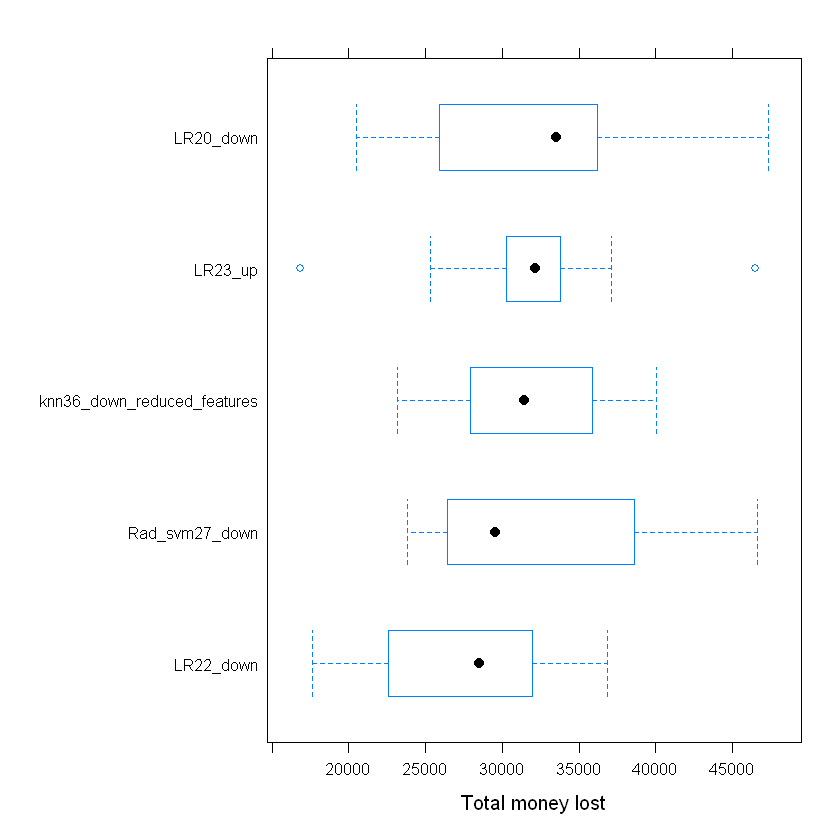

In [78]:
bwplot(finalreport1 , horizontal = T)

#### LR22_down has a mininal median and mean. It should be noted that it could have been better in terms of stability. 

#### Nevetheless, compared to the other models on the above graph, the 3rd quartile of LR22 reaches the mean of the others only. Meaning that, it performs significantly better in general, compared to the other models.

#### Therefore, LR22_down was selected out of these models.
#### FINAL model: LR22_down : A Penalized Logistic Regression model with down Sampling 
#### The model is given below. 

In [83]:
log_reg22

glmnet 

1287 samples
  60 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1158, 1158, 1159, 1158, 1158, 1159, ... 
Addtional sampling using down-sampling

Resampling results across tuning parameters:

  alpha      lambda        Total money lost
  0.1000000  1.913642e-05  35392.39        
  0.1000000  2.856102e-05  35392.39        
  0.1000000  4.262719e-05  35392.39        
  0.1000000  6.362089e-05  35392.39        
  0.1000000  9.495390e-05  35392.39        
  0.1000000  1.417183e-04  35392.39        
  0.1000000  2.115139e-04  34736.92        
  0.1000000  3.156836e-04  34545.91        
  0.1000000  4.711563e-04  34333.45        
  0.1000000  7.031987e-04  34103.91        
  0.1000000  1.049521e-03  34134.37        
  0.1000000  1.566405e-03  34576.33        
  0.1000000  2.337853e-03  34891.62        
  0.1000000  3.489235e-03  34515.36        
  0.1000000  5.207668e-03  33539.41        
  0.1000000  7.772421e-03

In [82]:
log_reg22$bestTune

,alpha,lambda
174,0.4,0.03856635


### 3.4. Prepration of the actual test data

In [85]:
#get actual test data
  
datatest <- read.csv("test.csv", header = T)
head(datatest) #ids are sorted

  

str(datatest)

#$ Var_39 and  $ Var_53  : char
#converto to numeric
unique(datatest$Var_39)
unique(datatest$Var_53)

datatest$Var_39=ifelse(datatest$Var_39== "Y",1,0)
datatest$Var_53=ifelse(datatest$Var_53== "Y",1,0)



loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
6,2106.0,NA,58,2,0,6,101,101,20,...,1500,1533,3300,N,1100,0,0,1,5,0
9,4034.0,NA,49,2,2,3,53,76,15,...,500,141,650,N,325,0,0,4,7,0
18,2742.0,NA,64,2,0,1,54,54,5,...,500,0,500,N,500,8729,294,0,5,0
20,1752.0,NA,69,4,1,2,140,140,12,...,2250,0,2250,N,2250,6075,607,0,8,0
22,2340.5,NA,31,1,1,1,28,87,4,...,0,0,0,N,0,0,0,0,2,0
23,2138.0,NA,28,4,0,0,112,112,8,...,1000,173,1000,N,1000,0,0,1,3,0


'data.frame':	847 obs. of  63 variables:
 $ loan_application_id: int  6 9 18 20 22 23 24 26 28 30 ...
 $ loan_amount        : num  2106 4034 2742 1752 2340 ...
 $ default            : logi  NA NA NA NA NA NA ...
 $ customer_age       : int  58 49 64 69 31 28 49 23 45 27 ...
 $ Var_1              : int  2 2 2 4 1 4 2 2 0 5 ...
 $ Var_2              : int  0 2 0 1 1 0 2 0 0 2 ...
 $ Var_3              : int  6 3 1 2 1 0 2 0 0 5 ...
 $ Var_4              : int  101 53 54 140 28 112 190 33 0 66 ...
 $ Var_5              : int  101 76 54 140 87 112 190 33 11 66 ...
 $ Var_6              : int  20 15 5 12 4 8 6 5 2 24 ...
 $ Var_7              : int  21 15 5 12 4 10 6 5 2 26 ...
 $ Var_8              : int  1184 987 1198 1622 1305 1617 1595 1441 1291 1261 ...
 $ Var_9              : int  13 5 0 3 1 1 2 1 0 11 ...
 $ Var_10             : int  16 9 0 4 2 5 3 3 0 18 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_13           

[1] N Y
Levels: N Y

[1] N Y
Levels: N Y

In [87]:
#now all numeric
str(datatest)
summary(datatest)


'data.frame':	847 obs. of  63 variables:
 $ loan_application_id: int  6 9 18 20 22 23 24 26 28 30 ...
 $ loan_amount        : num  2106 4034 2742 1752 2340 ...
 $ default            : logi  NA NA NA NA NA NA ...
 $ customer_age       : int  58 49 64 69 31 28 49 23 45 27 ...
 $ Var_1              : int  2 2 2 4 1 4 2 2 0 5 ...
 $ Var_2              : int  0 2 0 1 1 0 2 0 0 2 ...
 $ Var_3              : int  6 3 1 2 1 0 2 0 0 5 ...
 $ Var_4              : int  101 53 54 140 28 112 190 33 0 66 ...
 $ Var_5              : int  101 76 54 140 87 112 190 33 11 66 ...
 $ Var_6              : int  20 15 5 12 4 8 6 5 2 24 ...
 $ Var_7              : int  21 15 5 12 4 10 6 5 2 26 ...
 $ Var_8              : int  1184 987 1198 1622 1305 1617 1595 1441 1291 1261 ...
 $ Var_9              : int  13 5 0 3 1 1 2 1 0 11 ...
 $ Var_10             : int  16 9 0 4 2 5 3 3 0 18 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_13           

 loan_application_id  loan_amount   default         customer_age  
 Min.   :   6.0      Min.   : 783   Mode:logical   Min.   :19.00  
 1st Qu.: 678.5      1st Qu.:1931   NA's:847       1st Qu.:29.00  
 Median :1326.0      Median :2676                  Median :40.00  
 Mean   :1298.3      Mean   :2999                  Mean   :42.03  
 3rd Qu.:1892.5      3rd Qu.:3832                  3rd Qu.:53.00  
 Max.   :2558.0      Max.   :7833                  Max.   :74.00  
     Var_1            Var_2            Var_3           Var_4       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.00   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 0.000   1st Qu.: 0.00   1st Qu.: 33.00  
 Median : 2.000   Median : 0.000   Median : 1.00   Median : 67.00  
 Mean   : 2.445   Mean   : 1.217   Mean   : 2.73   Mean   : 77.89  
 3rd Qu.: 3.000   3rd Qu.: 2.000   3rd Qu.: 4.00   3rd Qu.:108.50  
 Max.   :11.000   Max.   :23.000   Max.   :44.00   Max.   :322.00  
     Var_5           Var_6            Var_7            

In [91]:
head(datatest)

#test data
#scale without target column (default) and ids

actualtestscl <- as.data.table(scale(datatest[,-c(1,3)]))
head(actualtestscl)

dim(actualtestscl) #847

#Drop loan
actualtestscl= actualtestscl[,-1]
head(actualtestscl)

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
6,2106.0,NA,58,2,0,6,101,101,20,...,1500,1533,3300,0,1100,0,0,1,5,0
9,4034.0,NA,49,2,2,3,53,76,15,...,500,141,650,0,325,0,0,4,7,0
18,2742.0,NA,64,2,0,1,54,54,5,...,500,0,500,0,500,8729,294,0,5,0
20,1752.0,NA,69,4,1,2,140,140,12,...,2250,0,2250,0,2250,6075,607,0,8,0
22,2340.5,NA,31,1,1,1,28,87,4,...,0,0,0,0,0,0,0,0,2,0
23,2138.0,NA,28,4,0,0,112,112,8,...,1000,173,1000,0,1000,0,0,1,3,0


loan_amount,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
-0.6366870,1.1131180,-0.2763162,-0.5773842,0.76514866,0.3916212,0.12331537,1.8238215,1.9461188,-0.2939053,...,-0.12780165,0.3923888,0.19970337,-0.3023025,-0.1276441,-0.2846826,-0.3655615,-0.004526326,0.2489849,-0.04266607
0.7373251,0.4858319,-0.2763162,0.3712955,0.06325597,-0.4216674,-0.27172290,1.0041373,0.9708525,-1.0260096,...,-0.36435966,-0.3378459,-0.37524141,-0.3023025,-0.4334176,-0.2846826,-0.3655615,2.295752561,0.9863632,-0.04266607
-0.1834340,1.5313087,-0.2763162,-0.5773842,-0.40467249,-0.4047239,-0.61935657,-0.6352310,-0.6545914,-0.2418776,...,-0.36435966,-0.4118136,-0.40778546,-0.3023025,-0.3643719,0.8405607,0.5935218,-0.771285955,0.2489849,-0.04266607
-0.8889693,1.8798009,0.9652744,-0.1030443,-0.17070826,1.0524181,0.73957507,0.5123268,0.4832193,1.3338190,...,0.04961686,-0.4118136,-0.02810494,-0.3023025,0.3260843,0.4984372,1.6145867,-0.771285955,1.3550523,-0.04266607
-0.4695678,-0.7687402,-0.8971115,-0.1030443,-0.40467249,-0.8452552,-0.09790606,-0.7991679,-0.8171358,0.1557629,...,-0.48263867,-0.4118136,-0.51626561,-0.3023025,-0.5616452,-0.2846826,-0.3655615,-0.771285955,-0.8570826,-0.04266607
-0.6138818,-0.9778355,0.9652744,-0.5773842,-0.63863672,0.5779998,0.29713221,-0.1434205,0.1581305,1.3152377,...,-0.24608066,-0.3210589,-0.29930531,-0.3023025,-0.1670987,-0.2846826,-0.3655615,-0.004526326,-0.4883934,-0.04266607


[1] 847  61

customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1.1131180,-0.2763162,-0.5773842,0.76514866,0.3916212,0.12331537,1.8238215,1.9461188,-0.2939053,2.6611387064,...,-0.12780165,0.3923888,0.19970337,-0.3023025,-0.1276441,-0.2846826,-0.3655615,-0.004526326,0.2489849,-0.04266607
0.4858319,-0.2763162,0.3712955,0.06325597,-0.4216674,-0.27172290,1.0041373,0.9708525,-1.0260096,0.5327303171,...,-0.36435966,-0.3378459,-0.37524141,-0.3023025,-0.4334176,-0.2846826,-0.3655615,2.295752561,0.9863632,-0.04266607
1.5313087,-0.2763162,-0.5773842,-0.40467249,-0.4047239,-0.61935657,-0.6352310,-0.6545914,-0.2418776,-0.7975249263,...,-0.36435966,-0.4118136,-0.40778546,-0.3023025,-0.3643719,0.8405607,0.5935218,-0.771285955,0.2489849,-0.04266607
1.8798009,0.9652744,-0.1030443,-0.17070826,1.0524181,0.73957507,0.5123268,0.4832193,1.3338190,0.0006282197,...,0.04961686,-0.4118136,-0.02810494,-0.3023025,0.3260843,0.4984372,1.6145867,-0.771285955,1.3550523,-0.04266607
-0.7687402,-0.8971115,-0.1030443,-0.40467249,-0.8452552,-0.09790606,-0.7991679,-0.8171358,0.1557629,-0.5314738776,...,-0.48263867,-0.4118136,-0.51626561,-0.3023025,-0.5616452,-0.2846826,-0.3655615,-0.771285955,-0.8570826,-0.04266607
-0.9778355,0.9652744,-0.5773842,-0.63863672,0.5779998,0.29713221,-0.1434205,0.1581305,1.3152377,-0.5314738776,...,-0.24608066,-0.3210589,-0.29930531,-0.3023025,-0.1670987,-0.2846826,-0.3655615,-0.004526326,-0.4883934,-0.04266607


### 3.5. Use the final model to predict

In [99]:
#fulltrainset

head(datatrain)
dim(datatrain)
#scale without target column (default) [2], drop loan [1]
scldatatrain <- as.data.table(scale(datatrain[,-c(1,2)]))
#add target col
allscldatatrain = cbind(scldatatrain, datatrain$default)
colnames(allscldatatrain)[61] <-  "default" 
head(allscldatatrain)
dim(allscldatatrain) #1715  61 #no id and no loan amount (63-2=61)

loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
2855.0,0,25,3,1,1,37,41,5,5,...,0,0,0,0,0.0,0,0,1,1,0
1577.0,0,53,0,0,0,0,26,2,2,...,0,0,0,0,0.0,0,0,0,1,0
6858.0,0,39,4,2,3,55,58,10,10,...,700,0,700,0,700.0,0,0,4,6,0
2434.5,0,49,3,1,3,98,98,11,11,...,16350,127,16935,0,8467.5,0,0,0,5,0
4964.0,0,47,2,1,1,110,124,15,15,...,3000,142,3400,0,1700.0,0,0,2,10,0
6899.0,0,44,1,0,1,37,37,5,5,...,150,0,150,0,150.0,0,0,0,3,0


[1] 1715   62

customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,default
-1.1941595,0.3733861,-0.0876829,-0.41944337,-0.7062579,-0.8414982,-0.6434325,-0.6594504,0.2733177,-0.53965146,...,-0.3955875,-0.5049999,-0.3370016,-0.5487394,-0.3127427,-0.2708166,-0.03191661,-1.1899824,-0.06053015,0
0.8542630,-1.6030250,-0.5991665,-0.64860724,-1.3620223,-1.0918833,-1.1253045,-1.1356430,0.8140350,-0.53965146,...,-0.3955875,-0.5049999,-0.3370016,-0.5487394,-0.3127427,-0.2708166,-0.81387346,-1.1899824,-0.06053015,0
-0.1699482,1.0321898,0.4238007,0.03888436,-0.3872374,-0.5577285,0.1596874,0.1342039,-0.7131261,-0.01662108,...,-0.3955875,-0.3452947,-0.3370016,-0.2484879,-0.3127427,-0.2708166,2.31395397,0.5398191,-0.06053015,0
0.5616312,0.3733861,-0.0876829,0.03888436,0.3748672,0.1099650,0.3203114,0.2929348,-0.1358738,0.24489411,...,-0.3294089,3.3587246,-0.3370016,3.0832313,-0.3127427,-0.2708166,-0.81387346,0.1938588,-0.06053015,0
0.4153153,-0.2854176,-0.0876829,-0.41944337,0.5875475,0.5439658,0.9628073,0.9278583,0.2879316,0.24489411,...,-0.3215926,0.2707110,-0.3370016,0.1804428,-0.3127427,-0.2708166,0.75004025,1.9236603,-0.06053015,0
0.1958415,-0.9442213,-0.5991665,-0.41944337,-0.7062579,-0.9082676,-0.6434325,-0.6594504,1.3401383,-0.53965146,...,-0.3955875,-0.4707773,-0.3370016,-0.4843998,-0.3127427,-0.2708166,-0.81387346,-0.4980618,-0.06053015,0


[1] 1715   61

#### Predict with Logreg22

In [106]:
set.seed(123)
TC22 <- trainControl(method="cv", number=10, summaryFunction = totalcost, savePredictions=TRUE)
TC22$sampling <- "down"


log_reg22_full <- train(as.factor(default) ~., data = alltrainsclall,
                        method = "glmnet",  metric = "Total money lost" ,
                        tuneGrid = expand.grid(alpha = c(0.4), lambda= c(0.03856635)) ,
                        trControl = TC22,
                        maximize = FALSE) 


In [122]:
alltrainsclall

customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,...,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59,default
-1.17831298,0.4003579,-0.08541655,-0.4178275,-0.69695199,-0.8225300076,-0.647845860,-0.66411962,0.27386693,-0.542012242,...,-0.396240703,-0.51084257,-0.3336351,-0.53983181,-0.3149138,-0.25999385,-0.03131743,-1.1962409,-0.07375928,0
0.88023584,-1.6416260,-0.58738504,-0.6447236,-1.34371811,-1.0693196908,-1.140234219,-1.14957321,0.81751366,-0.542012242,...,-0.396240703,-0.51084257,-0.3336351,-0.53983181,-0.3149138,-0.25999385,-0.82162206,-1.1962409,-0.07375928,0
0.58615744,0.4003579,-0.08541655,0.0359649,0.36933810,0.1152707886,0.336930859,0.30678756,-0.13754140,0.281240813,...,-0.325844569,3.45969755,-0.3336351,3.05455282,-0.3149138,-0.25999385,-0.82162206,0.1799039,-0.07375928,0
0.43911824,-0.2803034,-0.08541655,-0.4178275,0.57910009,0.5430395728,0.993448671,0.95405901,0.28856009,0.281240813,...,-0.317530065,0.28631340,-0.3336351,0.18180431,-0.3149138,-0.25999385,0.75898719,1.9000849,-0.07375928,0
0.21855943,-0.9609647,-0.58738504,-0.4178275,-0.69695199,-0.8883405898,-0.647845860,-0.66411962,1.34646722,-0.542012242,...,-0.396240703,-0.47567392,-0.3336351,-0.47615804,-0.3149138,-0.25999385,-0.82162206,-0.5081685,-0.07375928,0
-0.29607777,-0.9609647,-0.58738504,-0.6447236,-0.17254703,-0.2795927046,-0.647845860,-0.66411962,1.73583582,-0.267594557,...,-0.396240703,-0.39361375,-0.3336351,-0.32758589,-0.3149138,-0.25999385,-0.82162206,-0.5081685,-0.07375928,0
0.73319664,-0.9609647,-0.58738504,-0.1909313,-0.78435282,-0.5757403244,0.993448671,0.95405901,-0.90893202,1.378911554,...,0.164156862,-0.27638493,2.9949573,-0.11533997,0.0132363,0.38963323,2.33959644,0.5239401,-0.07375928,0
-0.07551897,-0.9609647,-0.58738504,-0.1909313,-0.15506686,-0.2137821224,-0.647845860,-0.66411962,-0.51221684,-0.267594557,...,-0.396240703,-0.51084257,-0.3336351,-0.53983181,-0.3149138,-0.25999385,-0.82162206,-1.1962409,-0.07375928,0
-1.32535218,0.4003579,-0.08541655,0.4897573,-0.64451149,-0.8389826532,0.829319218,0.79224115,0.28856009,0.281240813,...,0.848163386,0.01668712,-0.3336351,-0.06227849,0.8131320,0.63677397,-0.03131743,0.8679763,-0.07375928,0
-1.17831298,-0.9609647,-0.58738504,-0.6447236,-0.08514620,-0.2960453501,-0.647845860,-0.66411962,-0.43140449,-0.816429927,...,-0.341919277,-0.15915611,-0.3336351,0.09690595,-0.3149138,-0.25999385,-0.03131743,-0.5081685,-0.07375928,0


In [121]:
log_reg22_full

glmnet 

1287 samples
  60 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1158, 1158, 1159, 1158, 1158, 1159, ... 
Addtional sampling using down-sampling

Resampling results:

  Total money lost
  31675.92        

Tuning parameter 'alpha' was held constant at a value of 0.4
Tuning
 parameter 'lambda' was held constant at a value of 0.03856635

In [109]:
#use the model to predict
  
predicted_test_log_reg22  <-  predict(log_reg22_full   ,actualtestscl)
length(predicted_test_log_reg22) #847

[1] 847

In [118]:
#[it gives 1 and 2. This is why -1 is used in the performance measure calculation before]
result1 =cbind(datatest$loan_application_id, predicted_test_log_reg22)
head(result1)

,predicted_test_log_reg22
6,2
9,2
18,1
20,1
22,1
23,1


In [115]:
#need to convert 
#[it gives 1 and 2. This is why "-1" is used in the performance measure calculation before]
result = cbind(datatest$loan_application_id,as.numeric( predicted_test_log_reg22 )-1)
colnames(result) = c("loan_application_id", "prediction")
head(result)
tail(result)

loan_application_id,prediction
6,1
9,1
18,0
20,0
22,0
23,0


,loan_application_id,prediction
"[842,]",2550,0
"[843,]",2551,0
"[844,]",2552,0
"[845,]",2553,1
"[846,]",2557,0
"[847,]",2558,0


#### Final predictions are exported.

In [116]:
#expoert results
write.csv2(result,"C:/Users/y.akturk/Desktop/BOUN/BOUN/IE582/HW5/testpredictions.csv ", row.names = FALSE)

In [124]:
result[,2]

[1] 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 [75] 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0
[112] 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
[149] 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
[186] 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0
[223] 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1
[260] 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
[297] 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
[334] 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0
[371] 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0
[408] 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0
[445] 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
[482] 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1
[519] 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
[556] 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0
[593] 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
[630] 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0
[667] 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1
[704] 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0
[741] 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0
[778] 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0
[815] 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0

# 4. Conclusions and Future Work

#### * An indexing issue is fixed in the previously built performance metric "Total lost money" (Section 2.5)

#### * The loan amount is no longer kept as a feature, but, weighted in only as "cost" this time. (Section 2.3)

#### * The resulting model is still a Elastic net - Logistic regression model with down-sampling (like it was in the final).

#### * However the test predictions changed. This may be due to building the model differently (not using the loan amount as a feature) or because of the corrected evaluation (optimization) method.

#### ###

#### Data preparation, without understanding the data may be a difficult task. It may be difficult to understand, interpret and explain the model afterwards.

#### Particularly feature selection without an insight of the features may be hard but some techniques such as RF has the ability to select the important variables. These techniques can be used to reduce the size of the data set it the number of instances are not sufficient. Feature selection is sensitive to the problem's nature, it heavily depends on the data.  

#### Besides, feature elimination based on variable important, preproprocesiing with PCA could be tried out. 

#### Allowing the addition or deletion of instances may be useful to overcome imbalanced datasets. To enable the learner to learn each classes' pattern on sufficient data points is essential.

#### Other than, class-dependent misclassification costs, "example-dependent misclassification costs" can be introduced (like in this problem). Cost-sensitive learners can capture the pattern in the data with proper sampling techniques. Unlike the general learners which usually try the maximize ROC, Accuracy, etc., this type of models try to "minimize" the cost of misclassificaiton.

#### Besides the ones tried in this report, there are many algorithms that capture several strategies to reduce "example-dependent misclassification cost" in "imbalanced classification" problems. For instance,  a threshold can be determined/tuned based on the cost in order to minimize the cost of misclassfified predictions . (https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/)
